In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Load Dataset
train = pd.read_csv("credit_train.csv")
test = pd.read_csv("credit_test.csv")

In [262]:
# Display Data
train.head(10)

,Loan_ID,Loan_Status,Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Credit_Age,Open_Accounts,Credit_Problems,Credit_Balance,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,14dd8831-6af5-400b-83ec-68e61888a048,1,445412.0,709.000000,1.167493e+06,72.213157,1.235528,2.449490,1.0,477.692370,...,0,0,0,0,0,0,0,0,0,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,1,262328.0,1076.275101,1.378339e+06,182.471861,1.324282,5.916080,0.0,479.558130,...,0,0,0,0,0,0,0,0,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,1,99999999.0,741.000000,2.231892e+06,170.881626,1.173186,4.242641,1.0,545.890099,...,0,0,0,0,0,0,0,0,0,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,1,347666.0,721.000000,8.069490e+05,93.498128,1.079181,3.000000,0.0,506.289443,...,0,0,0,0,0,0,0,0,0,0
4,d4062e70-befa-4995-8643-a0de73938182,1,176220.0,1076.275101,1.378339e+06,143.665236,0.785330,3.872983,0.0,503.448111,...,0,0,0,0,0,0,0,0,0,0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,0,206602.0,7290.000000,8.968570e+05,127.936469,1.238046,2.449490,0.0,464.012931,...,0,0,0,0,0,0,0,0,0,0
6,273581de-85d8-4332-81a5-19b04ce68666,1,217646.0,730.000000,1.184194e+06,104.187715,1.292256,3.605551,1.0,349.528254,...,0,0,0,0,0,0,0,0,0,0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,0,648714.0,1076.275101,1.378339e+06,121.680442,0.913814,3.872983,0.0,439.665782,...,0,0,0,0,0,0,0,0,0,0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,1,548746.0,678.000000,2.559110e+06,136.602635,1.354108,2.000000,0.0,661.189080,...,0,0,0,0,0,0,0,0,0,0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,1,215952.0,739.000000,1.454735e+06,198.186150,1.143015,4.472136,0.0,818.266460,...,0,0,0,0,0,0,0,0,0,0


In [272]:
train['Credit_Balance'].min()

0.0

In [4]:
print("Training Indexes:\n\n\n", train.index)

Training Indexes:


 RangeIndex(start=0, stop=100514, step=1)


In [5]:
test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [6]:
# Data cleaning and formatting

In [7]:
# Data Size
print("Training Data Size:",train.size)
print("Test Data Size:    ",test.size)

Training Data Size: 1909766
Test Data Size:     186354


In [8]:
# Data Shape 
print("Training Data Shape:",train.shape)
print("Testing Data Shape: ",test.shape)

Training Data Shape: (100514, 19)
Testing Data Shape:  (10353, 18)


In [9]:
# Data Dimensions
print("Training Data Dimensions:",train.ndim)
print("Test Data Dimensions:    ",train.ndim)

Training Data Dimensions: 2
Test Data Dimensions:     2


In [10]:
# Columns
train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [11]:
# Data Types
train.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [12]:
# Labeled Columns
for col in train.columns:
    print(col,":", len(train[col].unique()), 'labels')

Loan ID : 82000 labels
Customer ID : 82000 labels
Loan Status : 3 labels
Current Loan Amount : 22005 labels
Term : 3 labels
Credit Score : 325 labels
Annual Income : 36175 labels
Years in current job : 12 labels
Home Ownership : 5 labels
Purpose : 17 labels
Monthly Debt : 65766 labels
Years of Credit History : 507 labels
Months since last delinquent : 117 labels
Number of Open Accounts : 52 labels
Number of Credit Problems : 15 labels
Current Credit Balance : 32731 labels
Maximum Open Credit : 44597 labels
Bankruptcies : 9 labels
Tax Liens : 13 labels


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [14]:
# Data Statistics
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan ID,100000,81999,f51d3aec-a6ad-41d7-a76c-3d34137ff142,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,100000,81999,2d896f7b-6e4e-4ffa-825e-a33c3da40eeb,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan Status,100000,2,Fully Paid,77361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Loan Amount,100000,NaN,NaN,NaN,1.17604e+07,3.17839e+07,10802,179652,312246,524942,1e+08
Term,100000,2,Short Term,72208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit Score,80846,NaN,NaN,NaN,1076.46,1475.4,585,705,724,741,7510
Annual Income,80846,NaN,NaN,NaN,1.37828e+06,1.08136e+06,76627,848844,1.17416e+06,1.65066e+06,1.65557e+08
Years in current job,95778,11,10+ years,31121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Ownership,100000,4,Home Mortgage,48410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purpose,100000,16,Debt Consolidation,78552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Varience of Data
print('variance of each column')
train.var()

variance of each column


Current Loan Amount             1.010219e+15
Credit Score                    2.176816e+06
Annual Income                   1.169340e+12
Monthly Debt                    1.482304e+08
Years of Credit History         4.921477e+01
Months since last delinquent    4.839045e+02
Number of Open Accounts         2.509880e+01
Number of Credit Problems       2.330041e-01
Current Credit Balance          1.415046e+11
Maximum Open Credit             7.029990e+13
Bankruptcies                    1.234987e-01
Tax Liens                       6.665817e-02
dtype: float64

In [16]:
# Is there any null?
train.isnull().sum().sum()

105653

In [17]:
# Missing data with respective features
train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [18]:
# Percentage of missing values in each feature
mis_val_percent = 100 * train.isnull().sum() / len(train)
mis_val_percent

Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

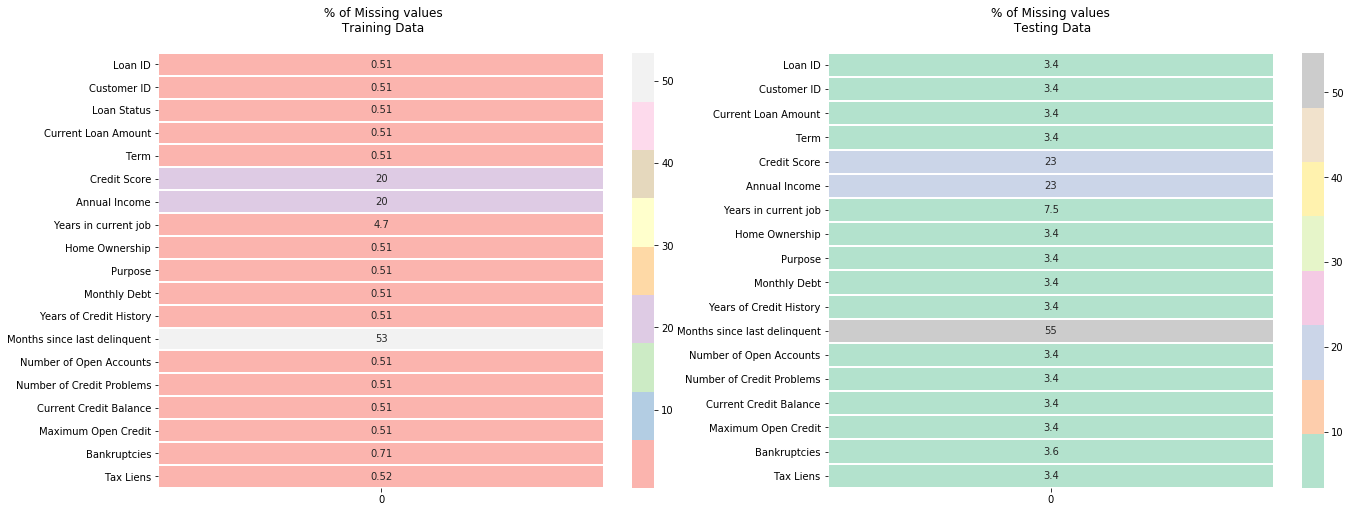

In [19]:
# Percentage of missing values in each feature
plt.figure(figsize=(22,8))
plt.subplot(121)
sns.heatmap(pd.DataFrame(train.isnull().sum()/train.shape[0]*100),annot=True,
cmap=sns.color_palette('Pastel1'),linewidth=1,linecolor="white")
plt.title(" % of Missing values\n Training Data\n")

plt.subplot(122)
sns.heatmap(pd.DataFrame(test.isnull().sum()/test.shape[0]*100),annot=True,
cmap=sns.color_palette("Pastel2"),linewidth=1,linecolor="white")
plt.title("% of Missing values\n Testing Data\n")
plt.show()

In [20]:
#drop feature that has missing value percentage more than 50%.
train = train.drop(['Months since last delinquent'], axis = 1)
test = test.drop(['Months since last delinquent'], axis = 1)

In [21]:
# Remove Unwanted or Unuseful features
train.drop(labels=['Customer ID'], axis=1, inplace=True)
test.drop(labels=['Customer ID'], axis=1, inplace=True)

In [22]:
# Dropping duplicate Rows
train = train[train.isna().all(axis=1)==False]
test = test[test.isna().all(axis=1)==False]

In [23]:
# As the number of missing values is so low in the 'Maximum Open Credit' I will drop these missing values.
for i in train['Maximum Open Credit'][train['Maximum Open Credit'].isnull() == True].index:
    train.drop(labels=i, inplace=True)

In [24]:
# As the number of missing values is so low in the 'Tax Liens' I will drop these missing values.
for i in train['Tax Liens'][train['Tax Liens'].isnull() == True].index:
    train.drop(labels=i, inplace=True)
for i in test['Tax Liens'][test['Tax Liens'].isnull() == True].index:
    test.drop(labels=i, inplace=True)

In [25]:
# As the number of missing values is so low in the 'Bankruptcies' with respect to total number of values I will drop these missing values.
for i in train['Bankruptcies'][train['Bankruptcies'].isnull() == True].index:
    train.drop(labels=i, inplace=True)
for i in test['Bankruptcies'][test['Bankruptcies'].isnull() == True].index:
    test.drop(labels=i, inplace=True)

In [26]:
# handle missing values for numeric columns.
train['Credit Score'].fillna(train['Credit Score'].mean(),inplace=True)
test['Credit Score'].fillna(train['Credit Score'].mean(),inplace=True)
train['Annual Income'].fillna(train['Annual Income'].mean(),inplace=True)
test['Annual Income'].fillna(train['Annual Income'].mean(),inplace=True)

In [27]:
# handle missing values for categorical columns.
train['Years in current job'].fillna(train['Years in current job'].mode()[0],inplace=True)
test['Years in current job'].fillna(train['Years in current job'].mode()[0],inplace=True)

In [28]:
# Number of missing values in each column.
# Missing Values 
print('\x1b[1;31m'+'\nTrain Data Missing Values'+'\x1b[0m')
display(train.isnull().sum())
print('\x1b[1;31m'+'\nTest Data Missing Values'+'\x1b[0m')
display(test.isnull().sum())


Train Data Missing Values


Loan ID                      0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64


Test Data Missing Values


Loan ID                      0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [29]:
# Remaining Data Columns.
print("Training Data Shape:",train.shape)
print("Testing Data Shape:",test.shape)

Training Data Shape: (99794, 17)
Testing Data Shape: (9978, 16)


In [30]:
# ValueCount of Categorical features
print('\x1b[1;31m'+'\n1. Loan Status:            \n'+'\x1b[0m',train['Loan Status'].value_counts())
print('\x1b[1;31m'+'\n2. Term:                   \n'+'\x1b[0m',train['Term'].value_counts())
print('\x1b[1;31m'+'\n3. Years in current job:   \n'+'\x1b[0m',train['Years in current job'].value_counts())
print('\x1b[1;31m'+'\n4. Home Ownership:         \n'+'\x1b[0m',train['Home Ownership'].value_counts())
print('\x1b[1;31m'+'\n5. Purpose:                \n'+'\x1b[0m',train['Purpose'].value_counts())


1. Loan Status:            
 Fully Paid     77207
Charged Off    22587
Name: Loan Status, dtype: int64

2. Term:                   
 Short Term    72002
Long Term     27792
Name: Term, dtype: int64

3. Years in current job:   
 10+ years    35312
2 years       9104
3 years       8151
< 1 year      8114
5 years       6778
1 year        6436
4 years       6132
6 years       5676
7 years       5573
8 years       4569
9 years       3949
Name: Years in current job, dtype: int64

4. Home Ownership:         
 Home Mortgage    48334
Rent             42085
Own Home          9162
HaveMortgage       213
Name: Home Ownership, dtype: int64

5. Purpose:                
 Debt Consolidation      78430
other                    6010
Home Improvements        5828
Other                    3242
Business Loan            1555
Buy a Car                1260
Medical Bills            1124
Buy House                 678
Take a Trip               572
major_purchase            352
small_business            277
movi

In [31]:
# Summary of Unique Values in each Column:
for i in train.columns:
    print(i)
    print(train[i].unique())
    print('-'*80)

Loan ID
['14dd8831-6af5-400b-83ec-68e61888a048'
 '4771cc26-131a-45db-b5aa-537ea4ba5342'
 '4eed4e6a-aa2f-4c91-8651-ce984ee8fb26' ...
 'e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7'
 '81ab928b-d1a5-4523-9a3c-271ebb01b4fb'
 'c63916c6-6d46-47a9-949a-51d09af4414f']
--------------------------------------------------------------------------------
Loan Status
['Fully Paid' 'Charged Off']
--------------------------------------------------------------------------------
Current Loan Amount
[  445412.   262328. 99999999. ...   486046.   100254.   274076.]
--------------------------------------------------------------------------------
Term
['Short Term' 'Long Term']
--------------------------------------------------------------------------------
Credit Score
[ 709.         1076.27510132  741.          721.         7290.
  730.          678.          739.          728.          740.
  743.          727.          723.          747.          687.
  750.          714.          724.          704.          688.

In [32]:
# Exploratory Data Analysis

In [33]:
# Correlation between Numerical features
train.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.095108,0.013074,-0.006571,0.019303,0.001656,-0.002834,0.003992,-0.001126,-0.000611,-0.002039
Credit Score,-0.095108,1.000000,-0.016989,-0.001457,-0.008652,0.005726,-0.002785,0.000168,-0.002073,-0.006257,0.004765
Annual Income,0.013074,-0.016989,1.000000,0.438551,0.144903,0.131580,-0.015490,0.284287,0.038990,-0.043115,0.037079
Monthly Debt,-0.006571,-0.001457,0.438551,1.000000,0.199743,0.411185,-0.055744,0.481000,0.039532,-0.078977,0.020025
Years of Credit History,0.019303,-0.008652,0.144903,0.199743,1.000000,0.132226,0.061887,0.208432,0.030742,0.066248,0.017345
Number of Open Accounts,0.001656,0.005726,0.131580,0.411185,0.132226,1.000000,-0.014184,0.227776,0.030985,-0.024582,0.006499
Number of Credit Problems,-0.002834,-0.002785,-0.015490,-0.055744,0.061887,-0.014184,1.000000,-0.112704,-0.012011,0.752941,0.581352
Current Credit Balance,0.003992,0.000168,0.284287,0.481000,0.208432,0.227776,-0.112704,1.000000,0.138464,-0.122609,-0.015677
Maximum Open Credit,-0.001126,-0.002073,0.038990,0.039532,0.030742,0.030985,-0.012011,0.138464,1.000000,-0.014574,-0.001022
Bankruptcies,-0.000611,-0.006257,-0.043115,-0.078977,0.066248,-0.024582,0.752941,-0.122609,-0.014574,1.000000,0.046109


In [34]:
# Data Visualization

In [35]:
sns.pairplot(train)

In [36]:
# Univariate Analysis

In [37]:
# Categorical Data

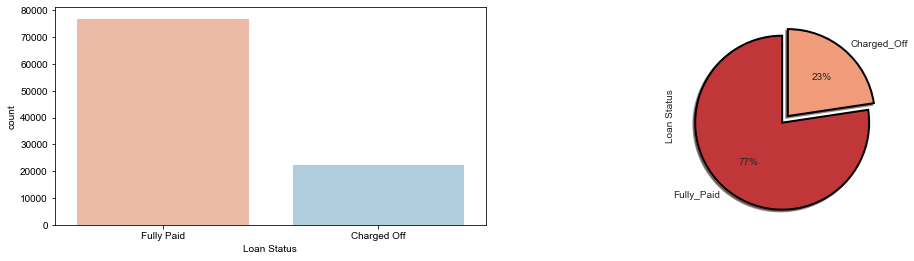

In [38]:
# Loan Status 

plt.figure(figsize=(17,4))
plt.subplot(121)
sns.set_style('whitegrid')
sns.countplot(x='Loan Status', data=train, palette='RdBu')

plt.subplot(122)
train["Loan Status"].value_counts().plot.pie(autopct = "%1.0f%%",
    colors = sns.color_palette("RdBu"),startangle = 90,labels=["Fully_Paid","Charged_Off"],
    wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)

plt.show()

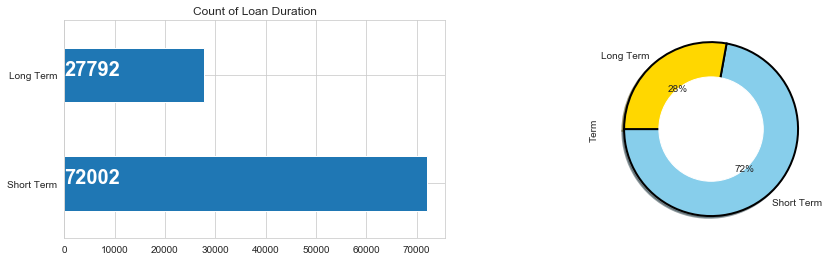

In [39]:
# Loan Term

plt.figure(figsize=(15,4))
plt.subplot(121)

x = train["Term"].value_counts().plot(kind="barh")
for i,j in enumerate(train["Term"].value_counts().values):
    x.text(.7,i,j,weight = "bold",fontsize=20, color='white')
plt.title("Count of Loan Duration")

plt.subplot(122)
train["Term"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 180,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0,0],shadow =True)
# Create a circle and place into pie chart
Circle = plt.Circle(xy=(0,0), radius=0.60, facecolor='white')
plt.gca().add_artist(Circle)
plt.show()

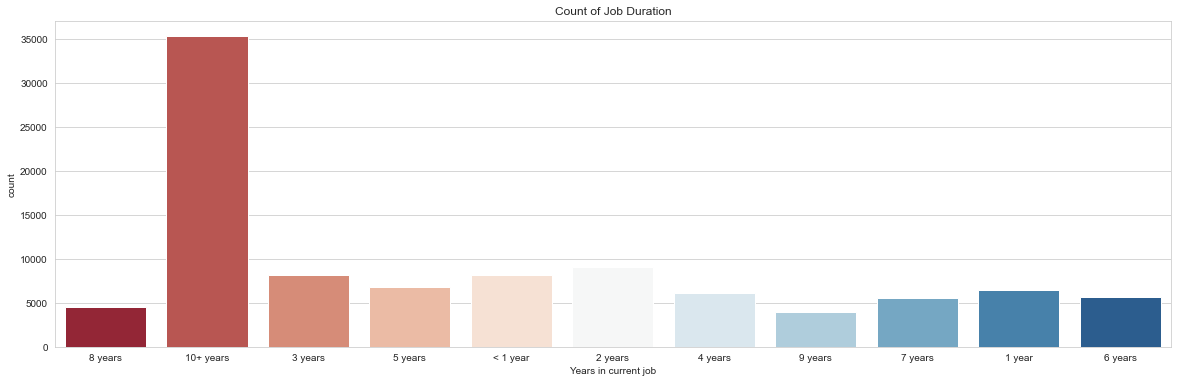

In [40]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='Years in current job', data=train, palette='RdBu')
plt.title("Count of Job Duration")
plt.show()

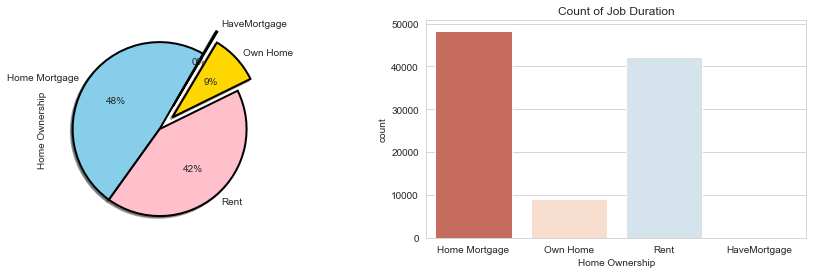

In [41]:
# Home Ownership

plt.figure(figsize=(15,4))
plt.subplot(121)
train["Home Ownership"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","pink","gold"],startangle = 60,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0,0,0.2,0.3],shadow =True)

plt.subplot(122)
sns.set_style('whitegrid')
sns.countplot(x='Home Ownership', data=train, palette='RdBu')
plt.title("Count of Job Duration")
plt.show()

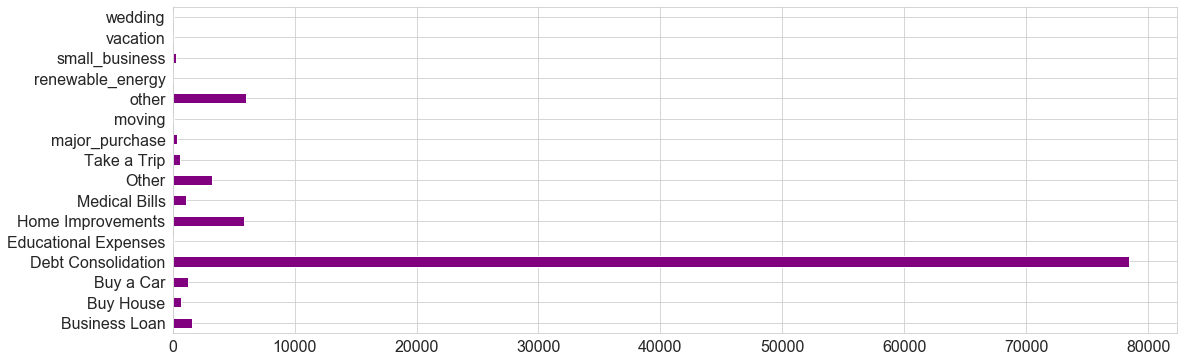

In [42]:
# Purpoose
plt.figure(figsize=(18,6))
train['Purpose'].value_counts().sort_index().plot.barh(color="purple",fontsize=16);

In [43]:
# Numerical Data

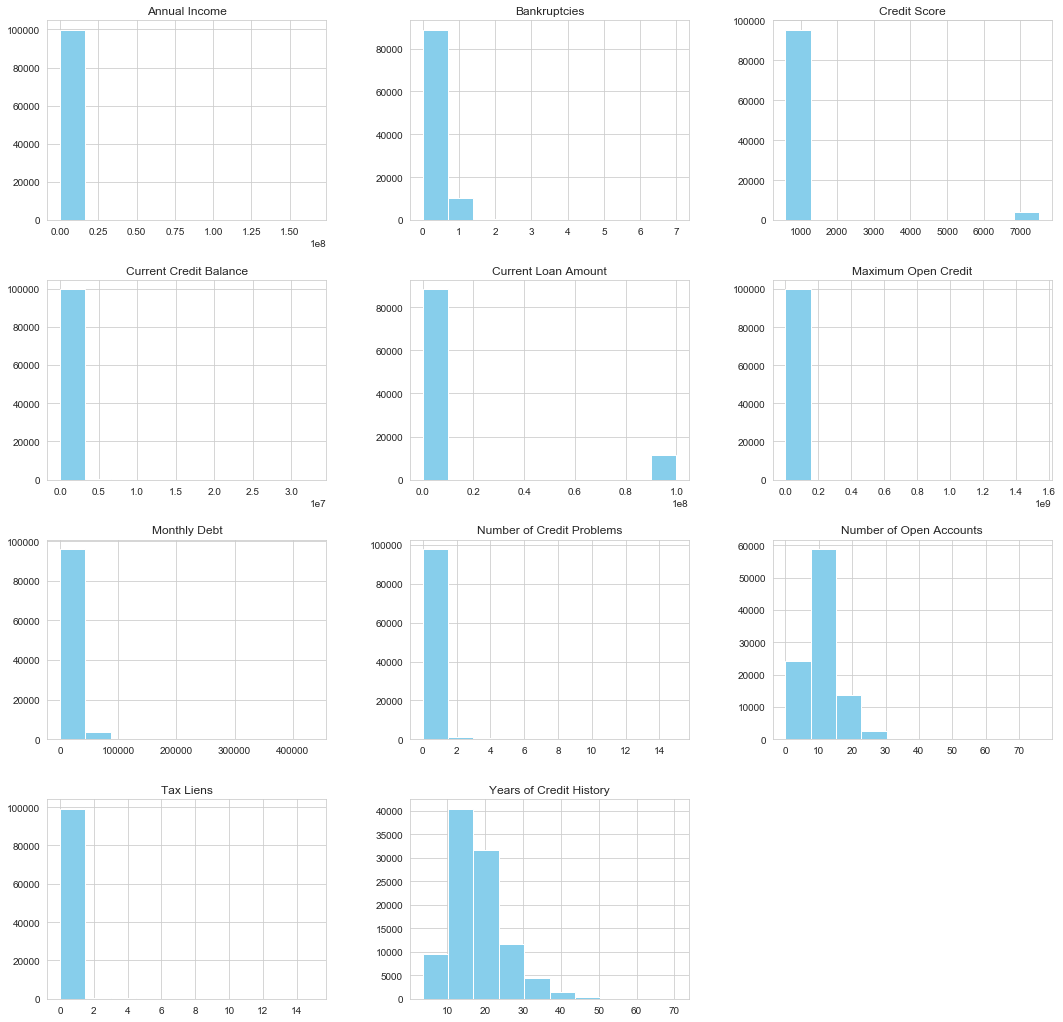

In [44]:
train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")].index.values].hist(figsize=[18,18], color='skyblue', edgecolor='white')
plt.show()

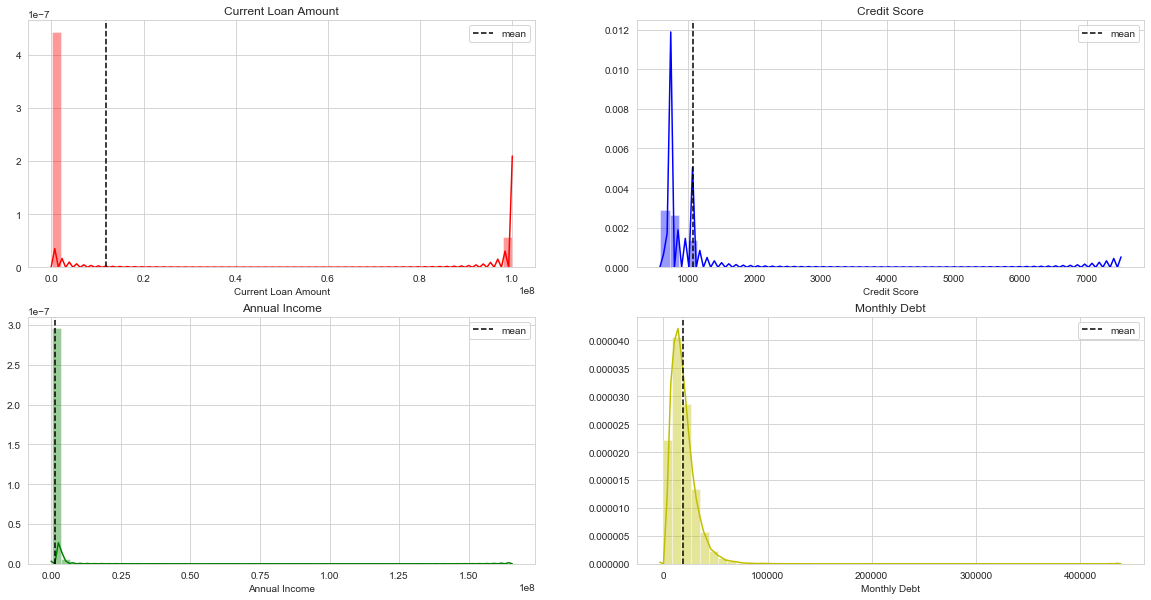

In [45]:
# Distribution Ploting
# 'Current Loan Amount', 'Credit Score','Annual Income','Monthly Debt' Visualization.

import itertools
cols = [ 'Current Loan Amount', 'Credit Score','Annual Income','Monthly Debt']
length = len(cols)
cs = ["r","b","g","y"]

ax = plt.figure(figsize=(20,10))
ax.set_facecolor("white")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(train[train[i].notnull()][i],color=k)
    plt.axvline(train[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

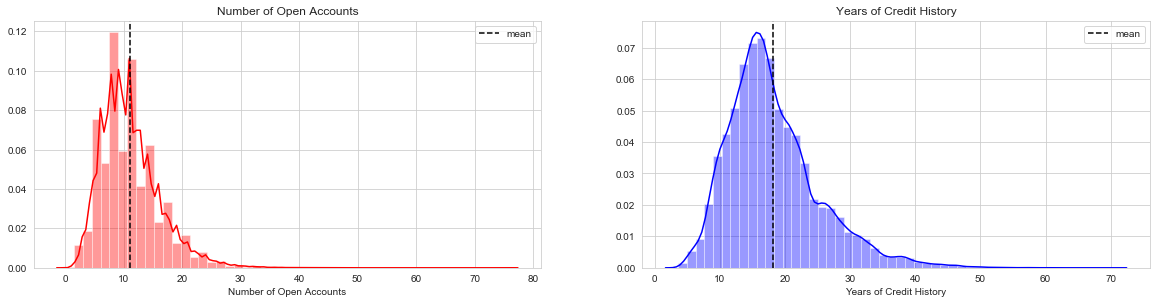

In [46]:
# Data Distribution
import itertools
cols = ['Number of Open Accounts', 'Years of Credit History']
length = len(cols)
cs = ["r","b"]

ax = plt.figure(figsize=(20,10))
ax.set_facecolor("white")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(train[train[i].notnull()][i],color=k)
    plt.axvline(train[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

In [47]:
# Outliers

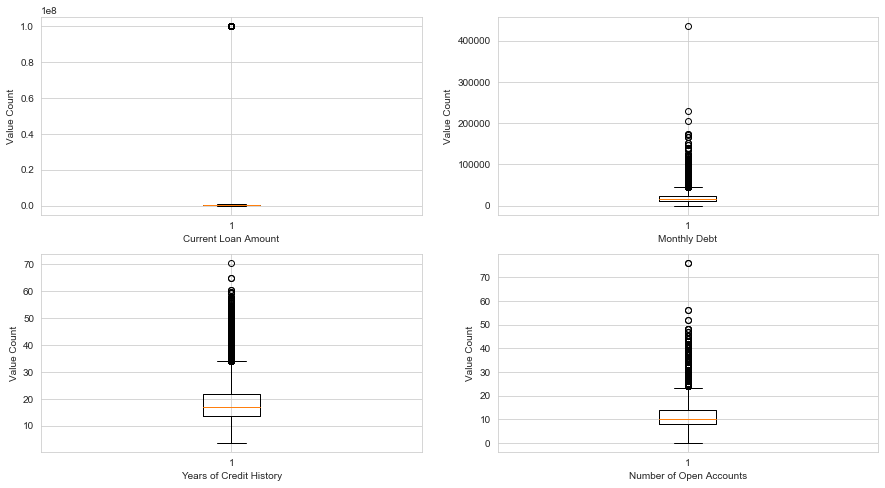

In [48]:
# Outliers Detection
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.boxplot(train['Current Loan Amount'])
plt.xlabel("Current Loan Amount")
plt.ylabel("Value Count")
 
plt.subplot(222)
plt.boxplot(train['Monthly Debt'])
plt.xlabel("Monthly Debt")
plt.ylabel("Value Count")

plt.subplot(223)
plt.boxplot(train['Years of Credit History'])
plt.xlabel("Years of Credit History")
plt.ylabel("Value Count")
 
plt.subplot(224)
plt.boxplot(train['Number of Open Accounts'])
plt.xlabel("Number of Open Accounts")
plt.ylabel("Value Count")
plt.show()

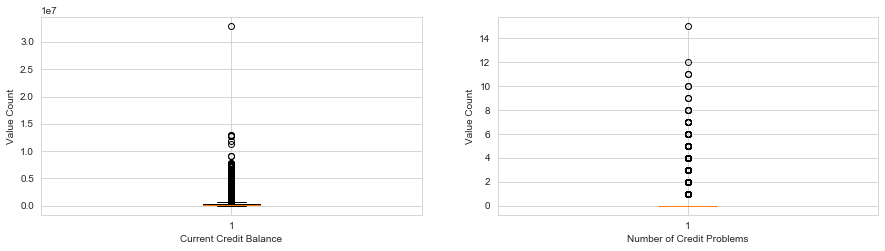

In [49]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.boxplot(train['Current Credit Balance'])
plt.xlabel("Current Credit Balance")
plt.ylabel("Value Count")
 
plt.subplot(222)
plt.boxplot(train['Number of Credit Problems'])
plt.xlabel("Number of Credit Problems")
plt.ylabel("Value Count")
 
plt.show()

In [50]:
# Removing Outliers

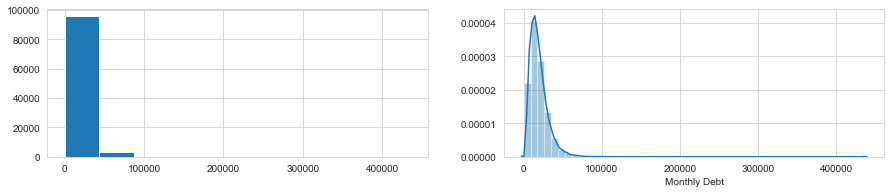

In [51]:
# Outlier Detected
plt.figure(figsize=(15,6))
plt.subplot(221)
train['Monthly Debt'].hist();
plt.subplot(222)
sns.distplot(train['Monthly Debt']);

In [52]:
print("Minimum value of Monthly Debt is:  ",train['Monthly Debt'].min())
print("Maximum value of Monthly Debt is:  ",train['Monthly Debt'].max())
print("Mean value of Monthly Debt is:  ",train['Monthly Debt'].mean())

Minimum value of Monthly Debt is:   0.0
Maximum value of Monthly Debt is:   435843.28
Mean value of Monthly Debt is:   18486.117117060836


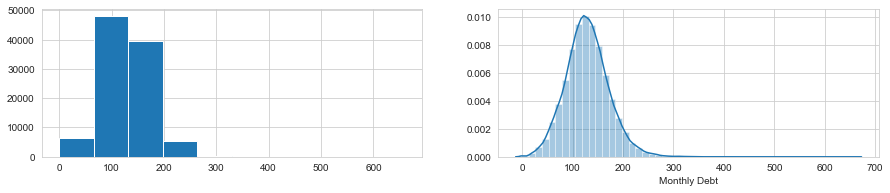

In [53]:
# Solve Outlier by turning into standard normal form.
train['Monthly Debt'] = np.sqrt(train['Monthly Debt'])
plt.figure(figsize=(15,6))
plt.subplot(221)
train['Monthly Debt'].hist()

plt.subplot(222)
sns.distplot(train['Monthly Debt'])
plt.show()

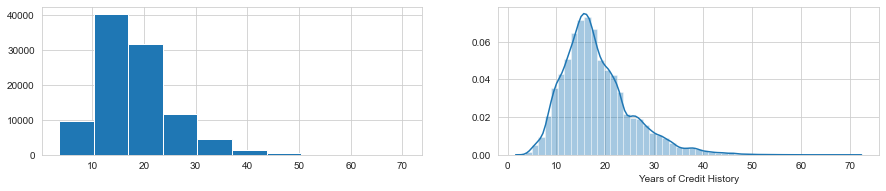

In [54]:
# Outlier Detected
plt.figure(figsize=(15,6))
plt.subplot(221)
train['Years of Credit History'].hist();
plt.subplot(222)
sns.distplot(train['Years of Credit History']);

In [55]:
print("Minimum value of Years of Credit History is:  ",train['Years of Credit History'].min())
print("Maximum value of Years of Credit History is:  ",train['Years of Credit History'].max())
print("Mean value of Years of Credit History is:  ",train['Years of Credit History'].mean())

Minimum value of Years of Credit History is:   3.6
Maximum value of Years of Credit History is:   70.5
Mean value of Years of Credit History is:   18.193694009659296


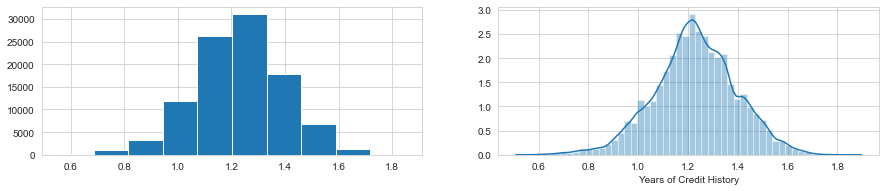

In [56]:
# Solve Outlier by turning into standard normal form.
train['Years of Credit History'] = np.log10(train['Years of Credit History'])
plt.figure(figsize=(15,6))
plt.subplot(221)
train['Years of Credit History'].hist()

plt.subplot(222)
sns.distplot(train['Years of Credit History'])
plt.show()

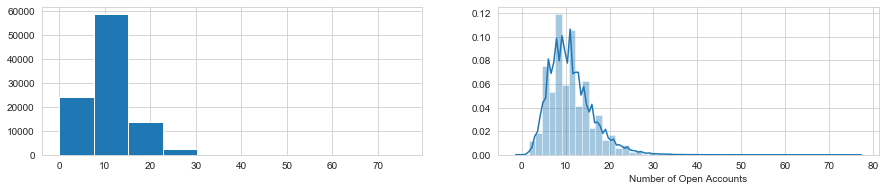

In [57]:
# Outlier Detected
plt.figure(figsize=(15,6))
plt.subplot(221)
train['Number of Open Accounts'].hist();
plt.subplot(222)
sns.distplot(train['Number of Open Accounts']);

In [58]:
print("Minimum value of Number of Open Accounts is:  ",train['Number of Open Accounts'].min())
print("Maximum value of Number of Open Accounts is:  ",train['Number of Open Accounts'].max())
print("Mean value of Number of Open Accounts is:  ",train['Number of Open Accounts'].mean())

Minimum value of Number of Open Accounts is:   0.0
Maximum value of Number of Open Accounts is:   76.0
Mean value of Number of Open Accounts is:   11.130909673928292


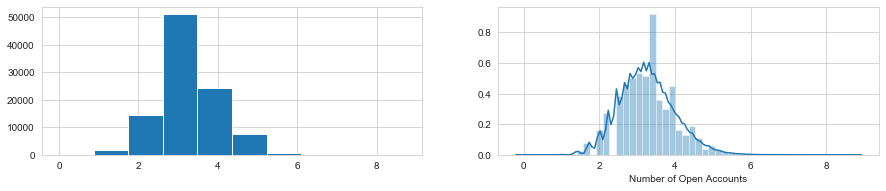

In [59]:
# Solve Outlier by turning into standard normal form.
train['Number of Open Accounts'] = np.sqrt(train['Number of Open Accounts'])
plt.figure(figsize=(15,6))
plt.subplot(221)
train['Number of Open Accounts'].hist()

plt.subplot(222)
sns.distplot(train['Number of Open Accounts'])
plt.show()

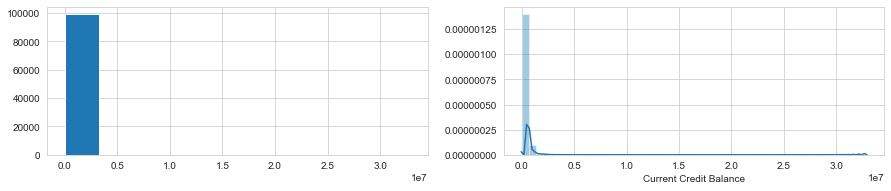

In [60]:
# Outlier Detected
plt.figure(figsize=(15,6))
plt.subplot(221)
train['Current Credit Balance'].hist();
plt.subplot(222)
sns.distplot(train['Current Credit Balance']);

In [61]:
print("Minimum value of Current Credit Balance is:  ",train['Current Credit Balance'].min())
print("Maximum value of Current Credit Balance is:  ",train['Current Credit Balance'].max())
print("Mean value of Current Credit Balance is:  ",train['Current Credit Balance'].mean())

Minimum value of Current Credit Balance is:   0.0
Maximum value of Current Credit Balance is:   32878968.0
Mean value of Current Credit Balance is:   294660.15716375737


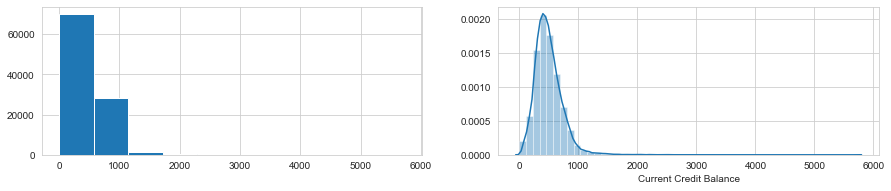

In [62]:
# Solve Outlier by turning into standard normal form.
train['Current Credit Balance'] = np.sqrt(train['Current Credit Balance'])
plt.figure(figsize=(15,6))
plt.subplot(221)
train['Current Credit Balance'].hist()

plt.subplot(222)
sns.distplot(train['Current Credit Balance'])
plt.show()

In [63]:
# Bivariate Data Analysis

In [64]:
# Continuous & Continuous Analysis:

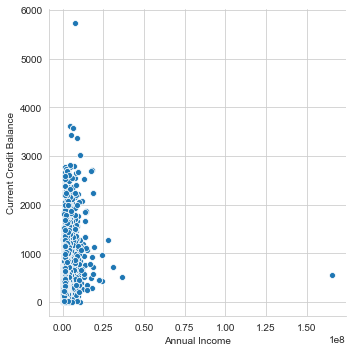

In [65]:
# How Annual Income effect Credit Score?
sns.relplot(x='Annual Income', y='Current Credit Balance', data=train);

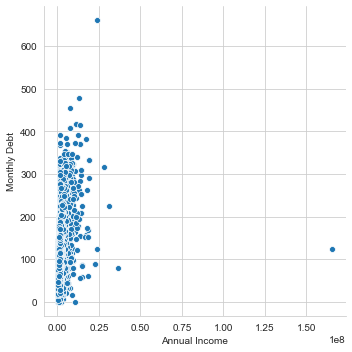

In [66]:
# How the Monthly Debt relate to Annual Income.
sns.relplot(x='Annual Income', y='Monthly Debt', data=train);

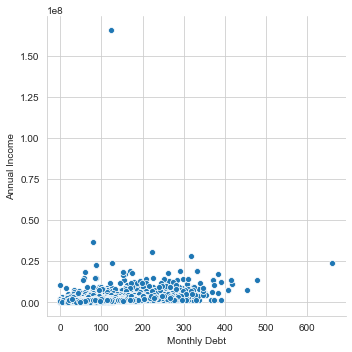

In [67]:
# How Monthly Debt effects Current Loan Amount?
sns.relplot(x='Monthly Debt', y='Annual Income', data=train);

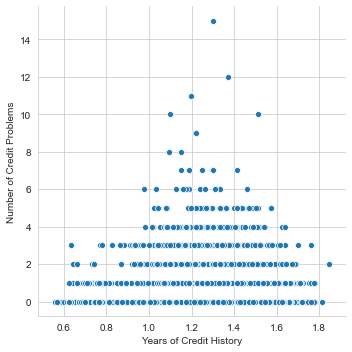

In [68]:
# How Years of Credit History shows Number of Credit Problems?
sns.relplot(x='Years of Credit History', y='Number of Credit Problems', data=train);

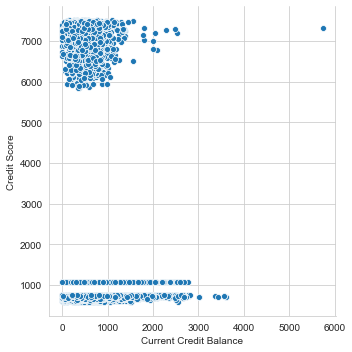

In [69]:
# How Current Credit Balance effects Credit Score?
sns.relplot(x='Current Credit Balance', y='Credit Score', data=train);

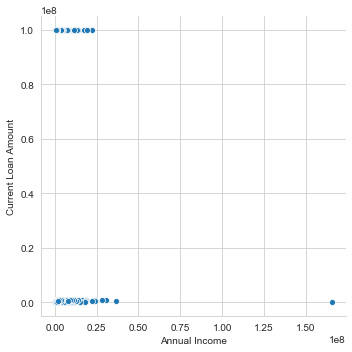

In [70]:
# How Annual Income effect Current Loan Amount?
sns.relplot(x='Annual Income', y='Current Loan Amount', data=train);

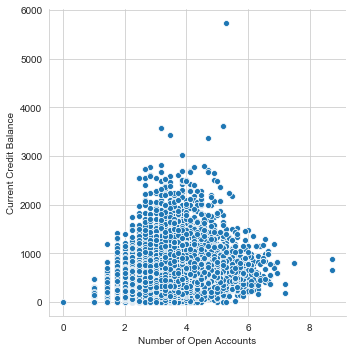

In [71]:
# How Number of Open Accounts effects Current Credit Balance?
sns.relplot(x='Number of Open Accounts', y='Current Credit Balance', data=train);

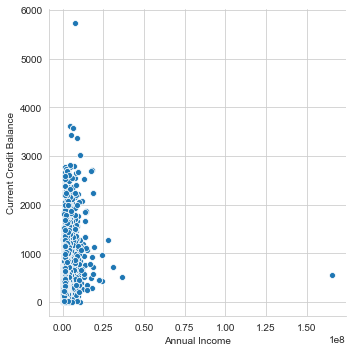

In [72]:
# How Years of Annual Income effects Current Credit Balance?
sns.relplot(x='Annual Income', y='Current Credit Balance', data=train);

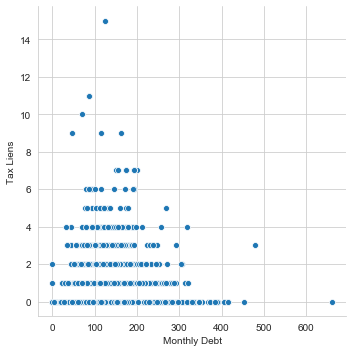

In [73]:
# How Monthly Debt effects Tax Liens?
sns.relplot(x='Monthly Debt', y='Tax Liens', data=train);

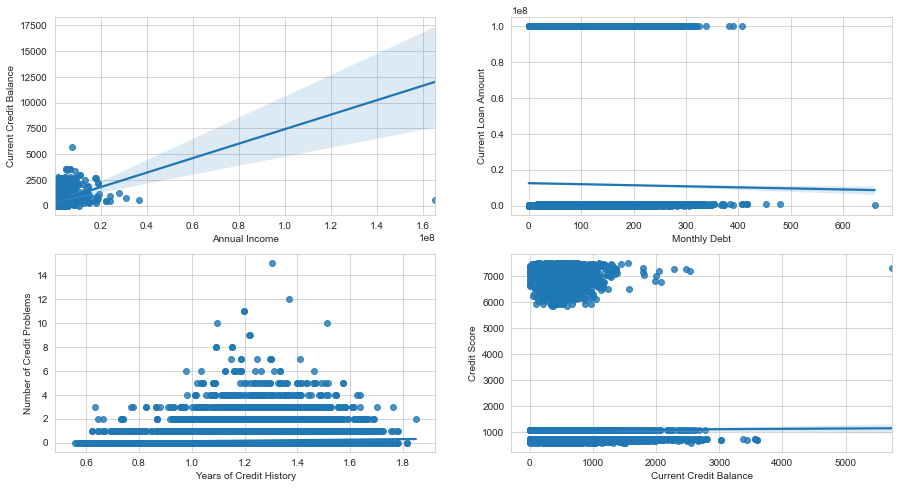

In [74]:
# Linear relationship Analysis
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.regplot(x='Annual Income', y='Current Credit Balance', data=train)

plt.subplot(222)
sns.regplot(x='Monthly Debt', y='Current Loan Amount', data=train)

plt.subplot(223)
sns.regplot(x='Years of Credit History', y='Number of Credit Problems', data=train)

plt.subplot(224)
sns.regplot(x='Current Credit Balance', y='Credit Score', data=train)
plt.show()

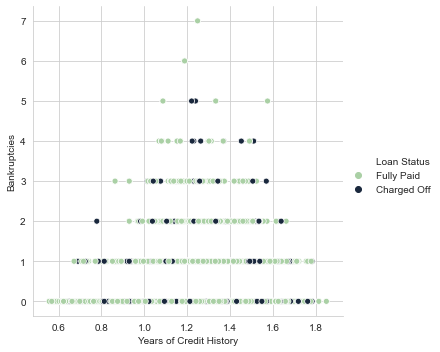

In [75]:
sns.relplot(x='Years of Credit History', y='Bankruptcies', hue="Loan Status" ,data=train, palette = 'ch:r=-0.5, l=0.75');

In [76]:
# Categorical & Categorical Analysis

In [77]:
# Loan approval rates in absolute numbers
loan_approval = train['Loan Status'].value_counts()[1]
print("Number of Loans were Approved:",loan_approval)

Number of Loans were Approved: 22587


In [78]:
# loan Duration With respect to loan status?
dataset = pd.crosstab(train['Term'],train['Loan Status'])
dataset

Loan Status,Charged Off,Fully Paid
Term,,
Long Term,8366,19426
Short Term,14221,57781


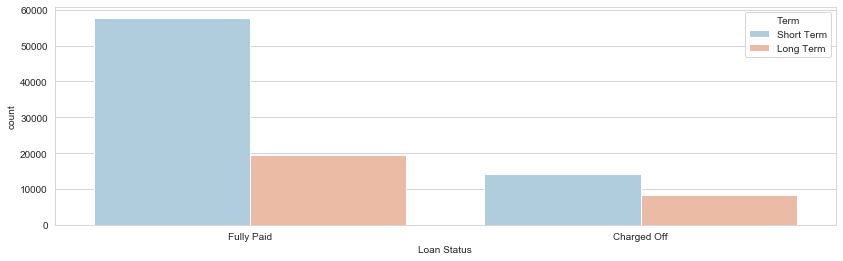

In [79]:
# How time period for loan approval effect loan status?
plt.figure(figsize=(14,4))
sns.countplot(x='Loan Status', hue="Term", data=train, palette="RdBu_r")
plt.show()

In [80]:
# Home Ownership with respect to Loan Status
dataset = pd.crosstab(train['Home Ownership'],train['Loan Status'])
dataset

Loan Status,Charged Off,Fully Paid
Home Ownership,,
HaveMortgage,31,182
Home Mortgage,9893,38441
Own Home,2096,7066
Rent,10567,31518


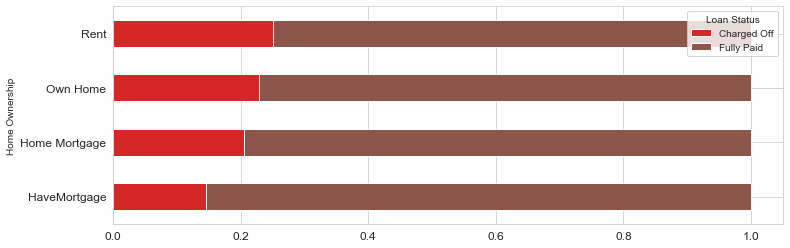

In [81]:
# Relationship between Home Ownership and Loan status.
Term = pd.crosstab(train['Home Ownership'], train['Loan Status'])
Term.div(Term.sum(1).astype(float), axis=0).plot(kind="barh",stacked=True,figsize=(12,4),color=['C3','C5'],fontsize=12)
plt.show()

In [82]:
# Purpose of loan with respect to status
dataset = pd.crosstab(train['Years in current job'],train['Loan Status'])
dataset

Loan Status,Charged Off,Fully Paid
Years in current job,,
1 year,1486,4950
10+ years,7983,27329
2 years,1997,7107
3 years,1729,6422
4 years,1369,4763
5 years,1530,5248
6 years,1318,4358
7 years,1289,4284
8 years,1048,3521


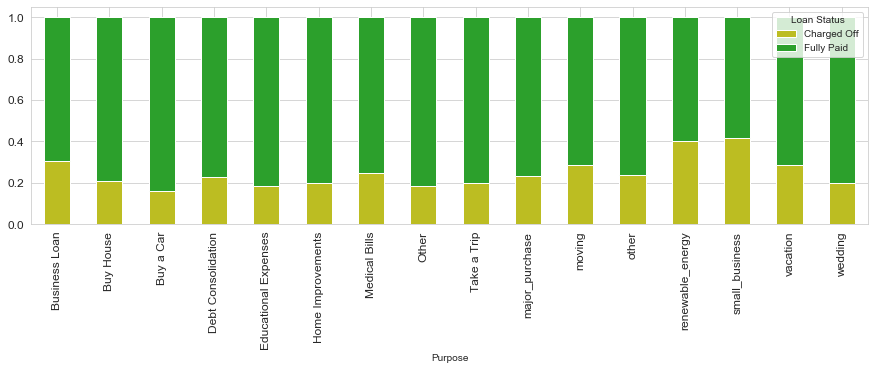

In [83]:
# How loan purpose effect loan approval
Purpose = pd.crosstab(train['Purpose'], train['Loan Status'])
Purpose.div(Purpose.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(15,4),color=['C8','C2'],fontsize=12)
plt.show()

In [84]:
# Categorical to Numerical Analysis

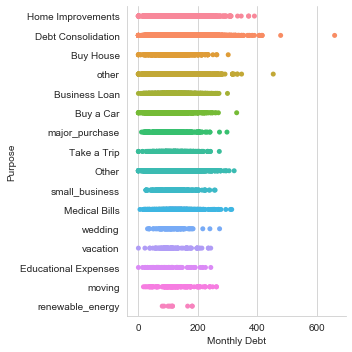

In [85]:
sns.catplot( y='Purpose', x='Monthly Debt', data=train, jitter=False);

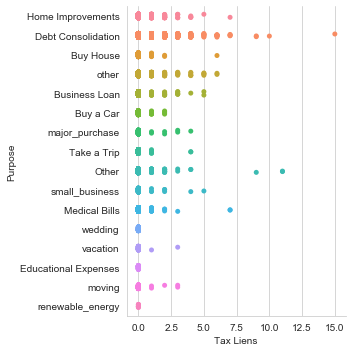

In [86]:
sns.catplot( y='Purpose', x='Tax Liens', data=train);

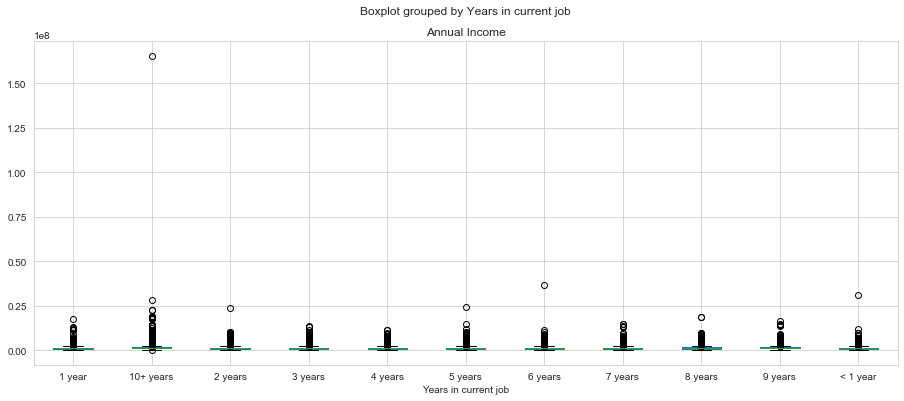

In [87]:
# How the Annual Income effect by the years in services?
train.boxplot('Annual Income', by='Years in current job',figsize=(15,6));

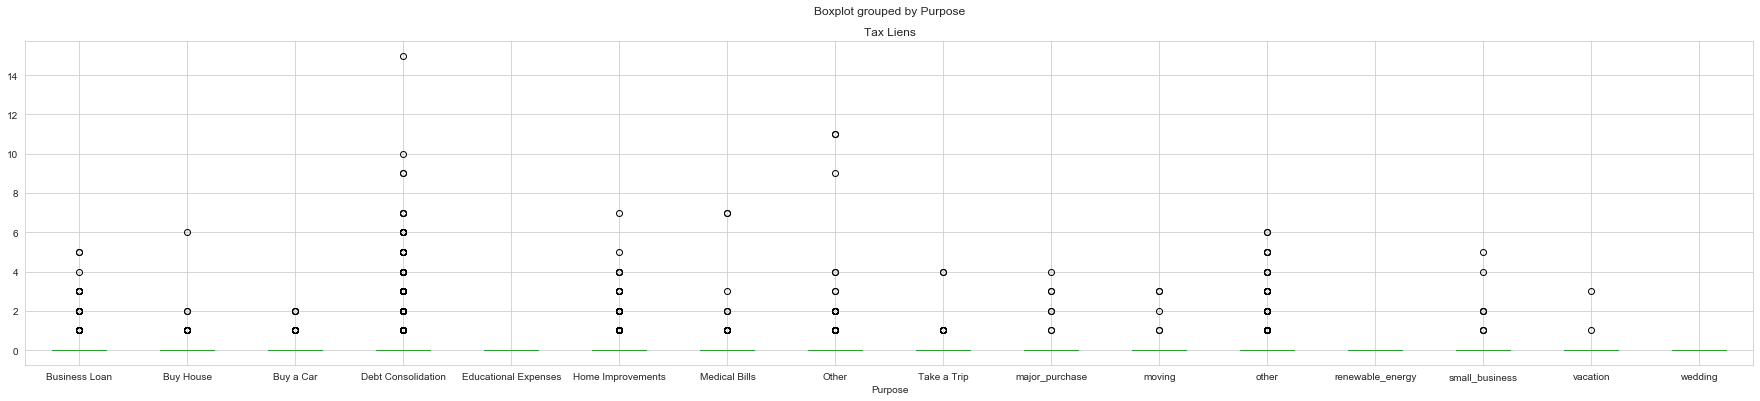

In [88]:
# How the bank approve Loan Amount with respect to purpose:
# How the Annual Income effect by the years in services?
train.boxplot('Tax Liens', by='Purpose',figsize=(30,6));

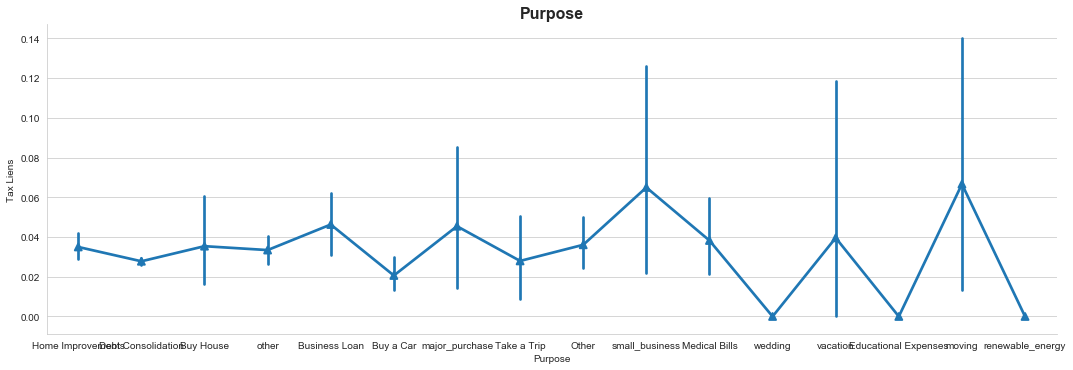

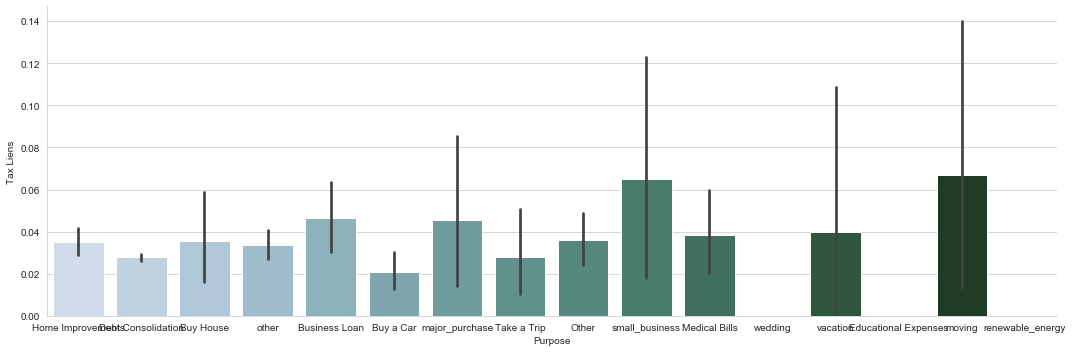

In [89]:
# How the bank approve Loan Amount with respect to purpose:
sns.catplot(x='Purpose', y='Tax Liens', data=train, kind='point', 
            markers=["^"], linestyles=["-"],aspect=3)
plt.title('Purpose', weight='bold', fontsize=16)

sns.catplot(x='Purpose', y='Tax Liens', data=train, kind='bar', palette="ch:10.75", aspect=3)

plt.show()

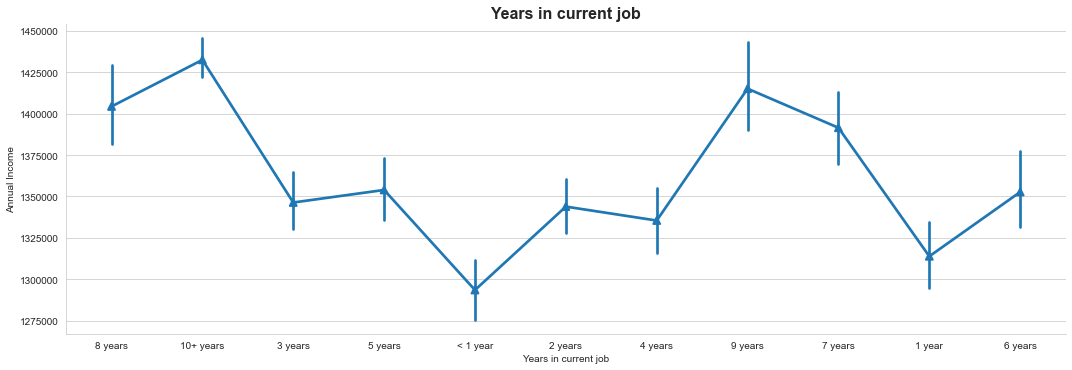

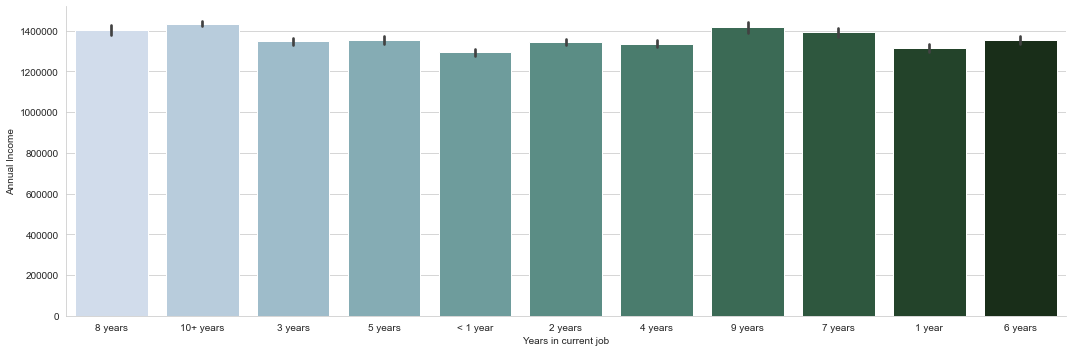

In [90]:
# How the Annual Income effect by the years in services?
sns.catplot(x='Years in current job', y='Annual Income', data=train, kind='point', 
            markers=["^"], linestyles=["-"],aspect=3)
plt.title('Years in current job', weight='bold', fontsize=16)

sns.catplot(x='Years in current job', y='Annual Income', data=train, kind='bar', palette="ch:10.75", aspect=3)

plt.show()

In [91]:
# Find correlations and sort 
correlations_data = train.corr()['Credit Score'].sort_values(ascending=False)

# Print the correlations
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Number of Open Accounts      0.005791
Tax Liens                    0.004765
Current Credit Balance       0.002375
Monthly Debt                 0.000189
Maximum Open Credit         -0.002073
Number of Credit Problems   -0.002785
Bankruptcies                -0.006257
Years of Credit History     -0.009905
Annual Income               -0.016989
Current Loan Amount         -0.095108
Name: Credit Score, dtype: float64>


In [92]:
# Feature Engineering and Feature Selection

In [93]:
# Renaming Columns
train = train.rename(columns={"Loan ID": "Loan_ID"})
train = train.rename(columns={"Loan Status": "Loan_Status"})
train = train.rename(columns={"Annual Income": "Annual_Income"})
train = train.rename(columns={"Monthly Debt": "Monthly_Debt"})
train = train.rename(columns={"Tax Liens": "Tax_Liens"})
train = train.rename(columns={"Years in current job": "Job_Age"})
train = train.rename(columns={"Current Loan Amount": "Loan_Amount"})
train = train.rename(columns={"Credit Score": "Credit_Score"})
train = train.rename(columns={"Home Ownership": "Home_Ownership"})
train = train.rename(columns={"Years of Credit History": "Credit_Age"})
train = train.rename(columns={"Number of Open Accounts": "Open_Accounts"})
train = train.rename(columns={"Number of Credit Problems": "Credit_Problems"})
train = train.rename(columns={"Number of Open Accounts": "Open_Accounts"})
train = train.rename(columns={"Current Credit Balance": "Credit_Balance"})
train = train.rename(columns={"Maximum Open Credit": 'Open_Credit'})


test = test.rename(columns={"Loan ID": "Loan_ID"})
test = test.rename(columns={"Loan Status": "Loan_Status"})
test = test.rename(columns={"Annual Income": "Annual_Income"})
test = test.rename(columns={"Monthly Debt": "Monthly_Debt"})
test = test.rename(columns={"Tax Liens": "Tax_Liens"})
test = test.rename(columns={"Years in current job": "Job_Age"})
test = test.rename(columns={"Current Loan Amount": "Loan_Amount"})
test = test.rename(columns={"Credit Score": "Credit_Score"})
test = test.rename(columns={"Home Ownership": "Home_Ownership"})
test = test.rename(columns={"Years of Credit History": "Credit_Age"})
test = test.rename(columns={"Number of Open Accounts": "Open_Accounts"})
test = test.rename(columns={"Number of Credit Problems": "Credit_Problems"})
test = test.rename(columns={"Number of Open Accounts": "Open_Accounts"})
test = test.rename(columns={"Current Credit Balance": "Credit_Balance"})
test = test.rename(columns={"Maximum Open Credit": 'Open_Credit'})

In [94]:
train.head()

,Loan_ID,Loan_Status,Loan_Amount,Term,Credit_Score,Annual_Income,Job_Age,Home_Ownership,Purpose,Monthly_Debt,Credit_Age,Open_Accounts,Credit_Problems,Credit_Balance,Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,72.213157,1.235528,2.449490,1.0,477.692370,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,262328.0,Short Term,1076.275101,1.378339e+06,10+ years,Home Mortgage,Debt Consolidation,182.471861,1.324282,5.916080,0.0,479.558130,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,170.881626,1.173186,4.242641,1.0,545.890099,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,93.498128,1.079181,3.000000,0.0,506.289443,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,Fully Paid,176220.0,Short Term,1076.275101,1.378339e+06,5 years,Rent,Debt Consolidation,143.665236,0.785330,3.872983,0.0,503.448111,427174.0,0.0,0.0


In [95]:
# Converting Categorical to Numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Loan_Status'] = labelencoder.fit_transform(train['Loan_Status'])

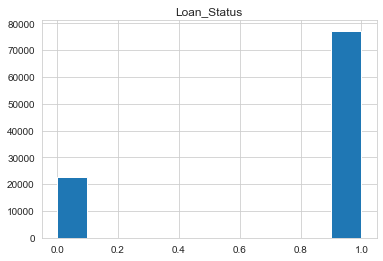

In [96]:
# Histogram of the Loan Status
plt.hist(train['Loan_Status']);
plt.title('Loan_Status');

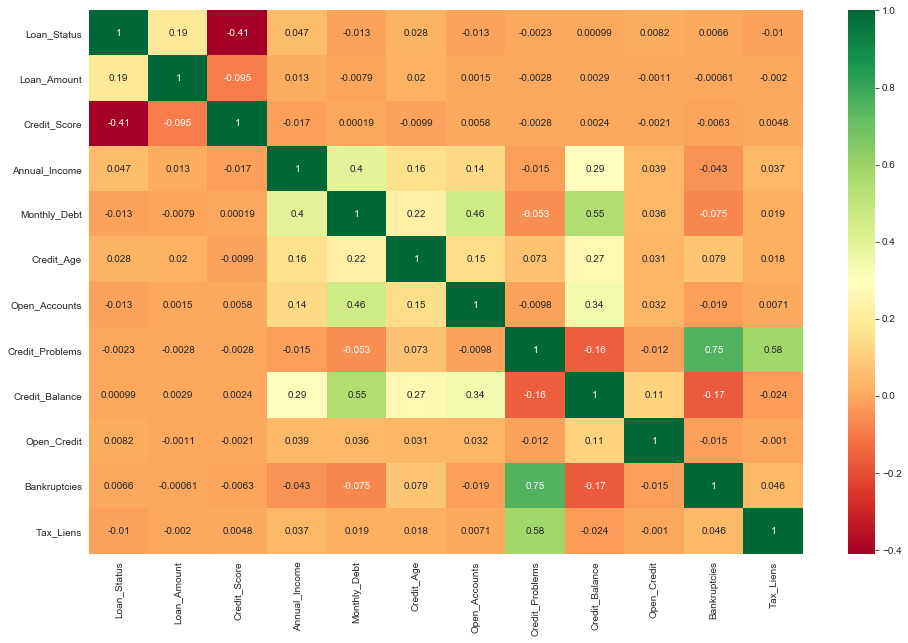

In [97]:
plt.figure(figsize=(16,10))
corr = train.corr()
corr_indx = corr.index
map = sns.heatmap(train[corr_indx].corr(),annot=True, cmap="RdYlGn")

In [98]:
# Select the categorical columns for Training Data
categorical_subset = train[['Term', 'Job_Age', 'Home_Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset, drop_first=True)
train.drop(labels=['Term', 'Job_Age', 'Home_Ownership', 'Purpose'], axis=1, inplace=True)
train = pd.concat([train, categorical_subset], axis = 1)

In [99]:
train = train.rename(columns={"Job_Age_< 1 year": "Job_Age_LessThan_1 years"})
test = test.rename(columns={"Job_Age_< 1 year": "Job_Age_LessThan_1 years"})

In [100]:
train.shape

(99794, 42)

In [101]:
# Select the categorical columns for Test Data
categorical_subset = test[['Term', 'Job_Age', 'Home_Ownership', 'Purpose']]
# One hot encode
categorical_subset = pd.get_dummies(categorical_subset, drop_first=True)
test.drop(labels=['Term', 'Job_Age', 'Home_Ownership', 'Purpose'], axis=1, inplace=True)
test = pd.concat([test, categorical_subset], axis = 1)

In [102]:
test.shape

(9978, 41)

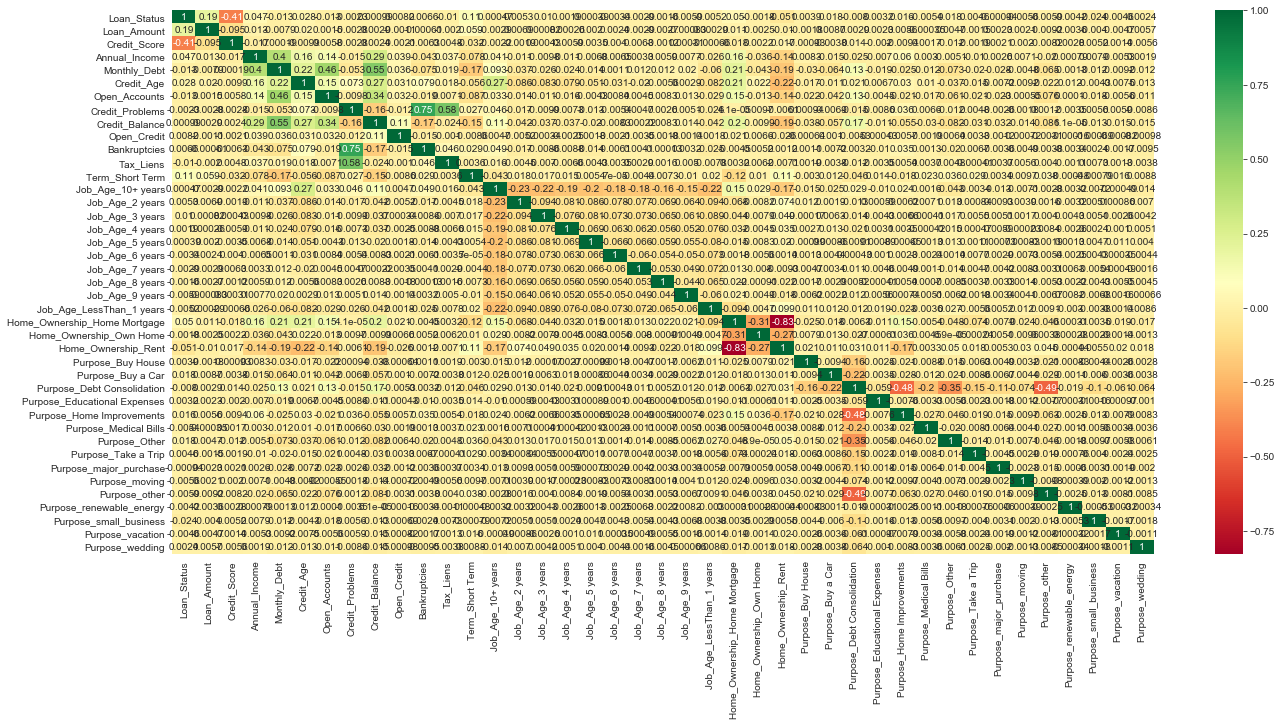

In [103]:
plt.figure(figsize=(22,10))
corr = train.corr()
corr_indx = corr.index
map = sns.heatmap(train[corr_indx].corr(),annot=True, cmap="RdYlGn")

In [104]:
# Threshold for removing correlated variables
threshold = 0.60

# Absolute value correlation matrix
corr_matrix = train.corr().abs()
corr_matrix.head()

,Loan_Status,Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Credit_Age,Open_Accounts,Credit_Problems,Credit_Balance,Open_Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
Loan_Status,1.000000,0.194571,0.410984,0.046701,0.012762,0.028251,0.012846,0.002347,0.000988,0.008215,...,0.005355,0.018340,0.004588,0.000941,0.005594,0.005911,0.004155,0.023807,0.004624,0.002396
Loan_Amount,0.194571,1.000000,0.095108,0.013074,0.007884,0.020195,0.001458,0.002834,0.002926,0.001126,...,0.000352,0.004668,0.001484,0.002307,0.002129,0.009170,0.003641,0.004041,0.004706,0.005719
Credit_Score,0.410984,0.095108,1.000000,0.016989,0.000189,0.009905,0.005791,0.002785,0.002375,0.002073,...,0.001653,0.011844,0.001889,0.002130,0.001990,0.008161,0.002833,0.005249,0.001427,0.005609
Annual_Income,0.046701,0.013074,0.016989,1.000000,0.397659,0.157596,0.135266,0.015490,0.289151,0.038990,...,0.002969,0.005081,0.010300,0.002571,0.007087,0.020011,0.000786,0.007906,0.005280,0.001944
Monthly_Debt,0.012762,0.007884,0.000189,0.397659,1.000000,0.223928,0.461253,0.053253,0.546459,0.035753,...,0.012082,0.072923,0.020405,0.027667,0.004843,0.064935,0.001255,0.012373,0.009182,0.011787


In [105]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,Loan_Status,Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Credit_Age,Open_Accounts,Credit_Problems,Credit_Balance,Open_Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
Loan_Status,NaN,0.194571,0.410984,0.046701,0.012762,0.028251,0.012846,0.002347,0.000988,0.008215,...,0.005355,0.018340,0.004588,0.000941,0.005594,0.005911,0.004155,0.023807,0.004624,0.002396
Loan_Amount,NaN,NaN,0.095108,0.013074,0.007884,0.020195,0.001458,0.002834,0.002926,0.001126,...,0.000352,0.004668,0.001484,0.002307,0.002129,0.009170,0.003641,0.004041,0.004706,0.005719
Credit_Score,NaN,NaN,NaN,0.016989,0.000189,0.009905,0.005791,0.002785,0.002375,0.002073,...,0.001653,0.011844,0.001889,0.002130,0.001990,0.008161,0.002833,0.005249,0.001427,0.005609
Annual_Income,NaN,NaN,NaN,NaN,0.397659,0.157596,0.135266,0.015490,0.289151,0.038990,...,0.002969,0.005081,0.010300,0.002571,0.007087,0.020011,0.000786,0.007906,0.005280,0.001944
Monthly_Debt,NaN,NaN,NaN,NaN,NaN,0.223928,0.461253,0.053253,0.546459,0.035753,...,0.012082,0.072923,0.020405,0.027667,0.004843,0.064935,0.001255,0.012373,0.009182,0.011787


In [106]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 2 columns to remove.


In [107]:
train = train.drop(columns = to_drop)
test = test.drop(columns = to_drop)

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (99794, 40)
Testing shape:  (9978, 39)


In [108]:
#Split Into Training and Testing Sets
features = train.drop(['Loan_Status','Loan_ID'], axis=1)
targets = train['Loan_Status']

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features.to_numpy(), targets.to_numpy(), test_size = 0.2)

print('Training Feature Size: ', X_train.shape)
print('Testing Feature Size:  ', X_test.shape)
print('Traning Target Size:   ', y_train.shape)
print('Testing Target Size:   ', y_test.shape)

Training Feature Size:  (79835, 38)
Testing Feature Size:   (19959, 38)
Traning Target Size:    (79835,)
Testing Target Size:    (19959,)


In [109]:
features.dtypes

Loan_Amount                     float64
Credit_Score                    float64
Annual_Income                   float64
Monthly_Debt                    float64
Credit_Age                      float64
Open_Accounts                   float64
Credit_Problems                 float64
Credit_Balance                  float64
Open_Credit                     float64
Tax_Liens                       float64
Term_Short Term                   uint8
Job_Age_10+ years                 uint8
Job_Age_2 years                   uint8
Job_Age_3 years                   uint8
Job_Age_4 years                   uint8
Job_Age_5 years                   uint8
Job_Age_6 years                   uint8
Job_Age_7 years                   uint8
Job_Age_8 years                   uint8
Job_Age_9 years                   uint8
Job_Age_LessThan_1 years          uint8
Home_Ownership_Home Mortgage      uint8
Home_Ownership_Own Home           uint8
Purpose_Buy House                 uint8
Purpose_Buy a Car                 uint8


In [110]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

In [112]:
X_train

array([[-0.36702241, -0.29642881, -0.72129036, ..., -0.05410233,
        -0.0308686 , -0.0343339 ],
       [-0.35571847, -0.3213192 , -0.59847961, ..., -0.05410233,
        -0.0308686 , -0.0343339 ],
       [-0.3453972 , -0.25796184,  0.48950322, ..., -0.05410233,
        -0.0308686 , -0.0343339 ],
       ...,
       [-0.36845107, -0.25494483, -0.33612568, ..., -0.05410233,
        -0.0308686 , -0.0343339 ],
       [-0.36142757, -0.26399588, -0.56749086, ..., -0.05410233,
        -0.0308686 , -0.0343339 ],
       [ 2.77799923, -0.24513952,  0.51190066, ..., -0.05410233,
        -0.0308686 , -0.0343339 ]])

In [113]:
X_test

array([[-3.57220535e-01,  2.00621071e-04, -6.86306455e-04, ...,
        -5.41023302e-02, -3.08686009e-02, -3.43338961e-02],
       [-3.66016186e-01, -2.70784165e-01,  2.79672603e-01, ...,
        -5.41023302e-02, -3.08686009e-02, -3.43338961e-02],
       [ 2.77799923e+00, -3.05479863e-01, -4.82140481e-01, ...,
        -5.41023302e-02, -3.08686009e-02, -3.43338961e-02],
       ...,
       [-3.64374922e-01, -2.63995877e-01, -9.82049836e-01, ...,
        -5.41023302e-02, -3.08686009e-02, -3.43338961e-02],
       [-3.62707343e-01, -2.71538420e-01, -3.04405355e-01, ...,
        -5.41023302e-02, -3.08686009e-02, -3.43338961e-02],
       [-3.64381155e-01, -2.57207588e-01, -4.89531261e-01, ...,
        -5.41023302e-02, -3.08686009e-02, -3.43338961e-02]])

In [114]:
y_train

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [115]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [116]:
# As we have purely imbalance dataset, We have to balance it.
# train and test sets: 80/20
from sklearn.utils import resample
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.2, random_state=1)

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)
X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))

# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

print("Original shape:", features.shape, targets.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (99794, 38) (99794,)
Upsampled shape: (36060, 38) (36060,)
Downsampled shape: (123610, 38) (123610,)


In [117]:
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [118]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))

In [119]:
# our classifier to use
classifier = RandomForestClassifier

In [120]:
# build normal model
pipeline = make_pipeline(classifier(random_state=42))
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)

In [121]:
# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

In [122]:
# build model with undersampling
nearmiss_pipeline = make_pipeline_imb(NearMiss(), classifier(random_state=42))
nearmiss_model = nearmiss_pipeline.fit(X_train, y_train)
nearmiss_prediction = nearmiss_model.predict(X_test)

1    77207
0    22587
Name: Loan_Status, dtype: int64

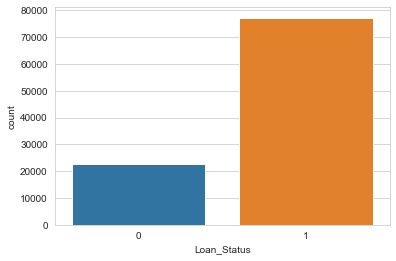

In [123]:
ax = sns.countplot(x=targets, data=train)
train['Loan_Status'].value_counts()


In [124]:
# print information about both models
print()
print("normal data distribution: {}".format(Counter(targets)))
X_smote, y_smote = SMOTE().fit_sample(features,targets)
print("SMOTE data distribution: {}".format(Counter(y_smote)))
X_nearmiss, y_nearmiss = NearMiss().fit_sample(features,targets)
print("NearMiss data distribution: {}".format(Counter(y_nearmiss)))



normal data distribution: Counter({1: 77207, 0: 22587})
SMOTE data distribution: Counter({1: 77207, 0: 77207})
NearMiss data distribution: Counter({0: 22587, 1: 22587})


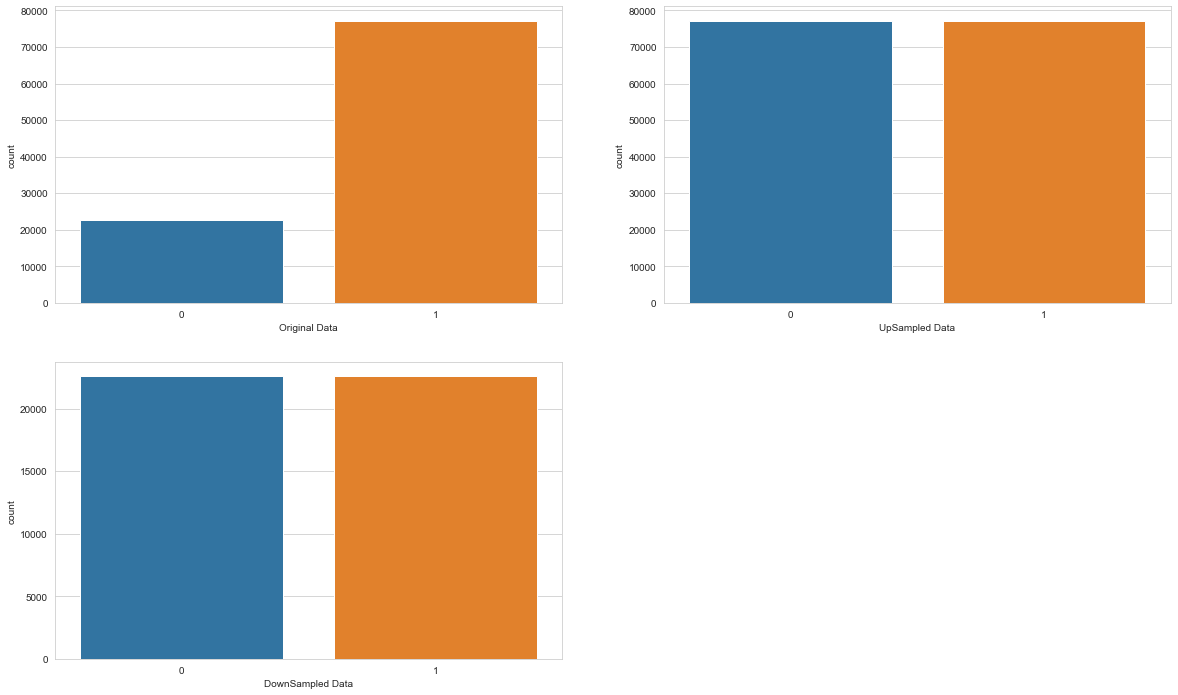

In [125]:
plt.figure(figsize=(20,12))
plt.subplot(221)
ax = sns.countplot(x=targets, data=train);
plt.xlabel("Original Data")
plt.subplot(222)
ax = sns.countplot(x=y_smote, data=train);
plt.xlabel("UpSampled Data")
plt.subplot(223)
ax = sns.countplot(x=y_nearmiss, data=train);
plt.xlabel("DownSampled Data");

In [126]:

# classification report
print(classification_report(y_test, prediction))
print(classification_report_imbalanced(y_test, smote_prediction))


              precision    recall  f1-score   support

           0       0.87      0.24      0.38      4557
           1       0.82      0.99      0.89     15402

    accuracy                           0.82     19959
   macro avg       0.84      0.62      0.64     19959
weighted avg       0.83      0.82      0.78     19959

                   pre       rec       spe        f1       geo       iba       sup

          0       0.65      0.33      0.95      0.43      0.56      0.29      4557
          1       0.83      0.95      0.33      0.88      0.56      0.33     15402

avg / total       0.79      0.81      0.47      0.78      0.56      0.32     19959



In [127]:

print()
print('normal Pipeline Score {}'.format(pipeline.score(X_test, y_test)))
print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))
print('NearMiss Pipeline Score {}'.format(nearmiss_pipeline.score(X_test, y_test)))


normal Pipeline Score 0.8190290094694123
SMOTE Pipeline Score 0.8056515857507891
NearMiss Pipeline Score 0.43153464602434993


In [128]:

print()
print_results("normal classification", y_test, prediction)
print()
print_results("SMOTE classification", y_test, smote_prediction)
print()
print_results("NearMiss classification", y_test, nearmiss_prediction)


normal classification
accuracy: 0.8190290094694123
precision: 0.8153418209051032
recall: 0.9896117387352292
f1: 0.8940638198029094

SMOTE classification
accuracy: 0.8056515857507891
precision: 0.8261534106991225
recall: 0.9475392806129074
f1: 0.8826927147911815

NearMiss classification
accuracy: 0.43153464602434993
precision: 0.7858753876515365
recall: 0.36196597844435785
f1: 0.49564366998577525


In [129]:
# As original data has highest accuracy and f1 score, so we use this to train further models.


In [130]:
X_train[y_train == 0].shape, X_train[y_train == 1].shape

((18030, 38), (61805, 38))

In [131]:

# Delete other type of sampling
del smote_prediction
del nearmiss_prediction

In [132]:
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print("X_test  Shape: ",X_test.shape)
print("y_test  Shape: ",y_test.shape)

X_train Shape:  (79835, 38)
y_train Shape:  (79835,)
X_test  Shape:  (19959, 38)
y_test  Shape:  (19959,)


In [133]:
# No need to perform Upsampling and Downsampling, rather data is in pretty decsent form, as upsample and downsample data have same size.

In [134]:
# Models to Evaluate

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
     # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

#### Logistic Regression

In [135]:
# Fitting Logistic Regression

from sklearn.linear_model import LogisticRegression
clf_lr = make_pipeline(LogisticRegression())

clf_lr.fit(X_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression())])

In [136]:
logr_cross = fit_and_evaluate(clf_lr)
print('Logistic Regression Performance: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance: Cross Validation Score = 0.8170


In [137]:
y_pred_lr = clf_lr.predict(X_test)

In [138]:
acc_logistic = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
print("Accuracy Score for Logistic Regression is:",acc_logistic)

Accuracy Score for Logistic Regression is: 81.75


In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.21      0.97      0.34       983
           1       1.00      0.81      0.89     18976

    accuracy                           0.82     19959
   macro avg       0.60      0.89      0.62     19959
weighted avg       0.96      0.82      0.87     19959



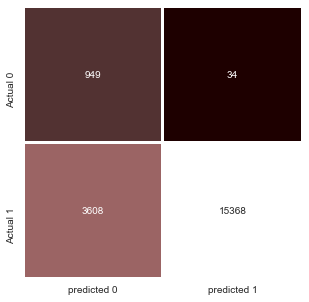

In [140]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_lr, y_test), cmap="pink",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [141]:
# ROC AUC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(y_test,clf_lr.predict(X_test))
log_fpr, log_tpr, thresholds = roc_curve(y_test,clf_lr.predict_proba(X_test)[:,1])

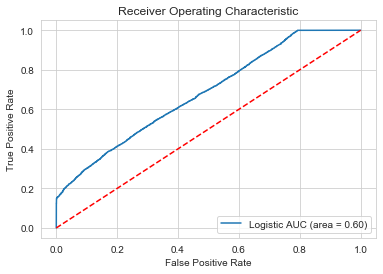

In [142]:
plt.figure()
plt.plot(log_fpr,log_tpr, label="Logistic AUC (area = %0.2f)" %log_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.show()

#### K-Nearest Neighbour

In [143]:
# Fitting KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
clf_knn = make_pipeline(KNeighborsClassifier())

clf_knn.fit(X_train, y_train)

Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier())])

In [144]:
knn_cross = fit_and_evaluate(clf_knn)
print('KNearestNeighbours Performance: Cross Validation Score = %0.4f' % knn_cross)

KNearestNeighbours Performance: Cross Validation Score = 0.7366


In [145]:
y_pred_knn = clf_knn.predict(X_test)

In [146]:
acc_knn = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
print("Accuracy Score for KNearestNeighbours is:",acc_knn)

Accuracy Score for KNearestNeighbours is: 73.73


In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.15      0.34      0.21      2099
           1       0.91      0.78      0.84     17860

    accuracy                           0.74     19959
   macro avg       0.53      0.56      0.53     19959
weighted avg       0.83      0.74      0.78     19959



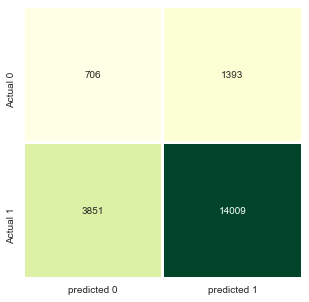

In [148]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_knn, y_test), cmap="YlGn",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [149]:
# ROC AUC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test,clf_knn.predict(X_test))
knn_fpr, knn_tpr, thresholds = roc_curve(y_test,clf_knn.predict_proba(X_test)[:,1])

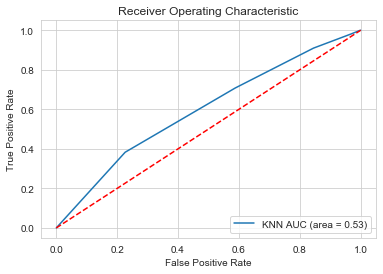

In [150]:
plt.figure()
plt.plot(knn_fpr, knn_tpr, label="KNN AUC (area = %0.2f)" %knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#### Naive Bayes

In [151]:
# Fitting Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_naive = make_pipeline(GaussianNB())

clf_naive.fit(X_train, y_train)

Pipeline(steps=[('gaussiannb', GaussianNB())])

In [152]:
naive_cross= fit_and_evaluate(clf_naive)
print('Naive Bayes Performance: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance: Cross Validation Score = 0.3454


In [153]:
y_pred_naive = clf_naive.predict(X_test)

In [154]:
acc_naive = round(accuracy_score(y_pred_naive, y_test) * 100, 2)
print("Accuracy Score for NaiveBayes is:",acc_naive)

Accuracy Score for NaiveBayes is: 34.45


In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_naive, y_test))

              precision    recall  f1-score   support

           0       1.00      0.26      0.41     17615
           1       0.15      0.99      0.26      2344

    accuracy                           0.34     19959
   macro avg       0.57      0.63      0.34     19959
weighted avg       0.90      0.34      0.39     19959



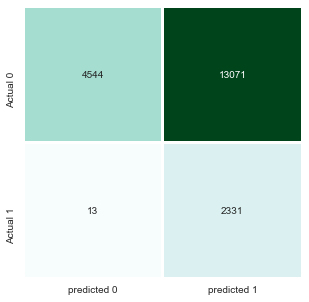

In [156]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_naive, y_test), cmap="BuGn",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [157]:
# ROC AUC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
naive_roc_auc = roc_auc_score(y_test,clf_naive.predict(X_test))
naive_fpr, naive_tpr, thresholds = roc_curve(y_test,clf_naive.predict_proba(X_test)[:,1])

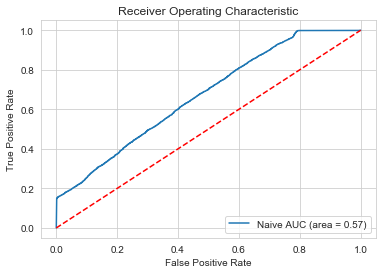

In [158]:
plt.figure()
plt.plot(naive_fpr,naive_tpr, label="Naive AUC (area = %0.2f)" %naive_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [159]:
# Fitting RandomForest
from sklearn.ensemble import RandomForestClassifier
clf_rf = make_pipeline(RandomForestClassifier())
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [160]:
random_cross = fit_and_evaluate(clf_rf)
print('Random Forest Performance : Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance : Cross Validation Score = 0.8195


In [161]:
y_pred_rf = clf_rf.predict(X_test)

In [162]:
acc_rf = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
print("Accuracy Score for RandomForest is:",acc_rf)

Accuracy Score for RandomForest is: 81.94


In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.24      0.88      0.38      1268
           1       0.99      0.82      0.89     18691

    accuracy                           0.82     19959
   macro avg       0.62      0.85      0.64     19959
weighted avg       0.94      0.82      0.86     19959



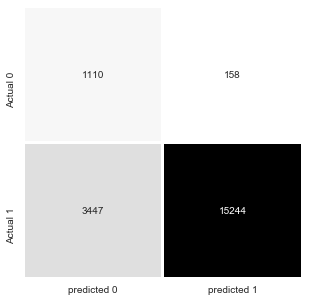

In [164]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_rf, y_test), cmap="Greys",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [165]:
# ROC AUC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test,clf_rf.predict(X_test))
rf_fpr, rf_tpr, thresholds = roc_curve(y_test,clf_rf.predict_proba(X_test)[:,1])

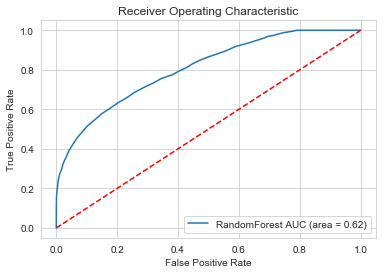

In [166]:
plt.figure()
plt.plot(rf_fpr,rf_tpr, label="RandomForest AUC (area = %0.2f)" %rf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#### Extra Tree Classiifier

In [167]:
# Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
clf_xtree = make_pipeline(ExtraTreesClassifier())

clf_xtree.fit(X_train, y_train)

Pipeline(steps=[('extratreesclassifier', ExtraTreesClassifier())])

In [168]:
xtree_cross = fit_and_evaluate(clf_xtree)
print('Extra Tree Classifier Performance : Cross Validation Score = %0.4f' % xtree_cross)

Extra Tree Classifier Performance : Cross Validation Score = 0.8166


In [169]:
y_pred_xtree = clf_xtree.predict(X_test)

In [170]:
acc_xtree = round(accuracy_score(y_pred_xtree, y_test) * 100, 2)
print("Accuracy Score for Extra Tree Classifier is:",acc_xtree)

Accuracy Score for Extra Tree Classifier is: 81.77


In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_xtree, y_test))

              precision    recall  f1-score   support

           0       0.27      0.80      0.40      1511
           1       0.98      0.82      0.89     18448

    accuracy                           0.82     19959
   macro avg       0.62      0.81      0.65     19959
weighted avg       0.93      0.82      0.86     19959



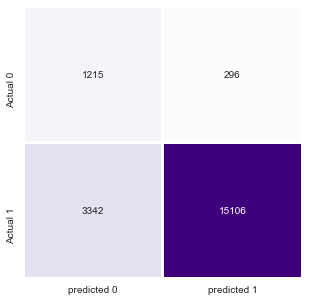

In [172]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_xtree, y_test), cmap="Purples",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [173]:
# ROC AUC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xtree_roc_auc = roc_auc_score(y_test,clf_xtree.predict(X_test))
xtree_fpr, xtree_tpr, thresholds = roc_curve(y_test,clf_xtree.predict_proba(X_test)[:,1])

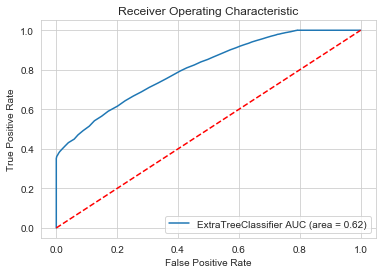

In [174]:
plt.figure()
plt.plot(xtree_fpr,xtree_tpr, label="ExtraTreeClassifier AUC (area = %0.2f)" %xtree_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#### Gradient Boosting

In [175]:
# Gradiente Boosting Classification
from xgboost import XGBClassifier
clf_xgboost = make_pipeline(XGBClassifier())

In [176]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [177]:
clf_xgboost.fit(X_train, y_train)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [178]:
gb_cross = fit_and_evaluate(clf_xgboost)
print('Gradient Boosting Performance : Cross Validation Score = %0.4f' % gb_cross)

Gradient Boosting Performance : Cross Validation Score = 0.8186


In [179]:
y_pred_xgb = clf_xgboost.predict(X_test)

In [180]:
acc_xgboost = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
print("Accuracy Score for RandomForest is:",acc_xgboost)

Accuracy Score for RandomForest is: 81.97


In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.25      0.86      0.39      1348
           1       0.99      0.82      0.89     18611

    accuracy                           0.82     19959
   macro avg       0.62      0.84      0.64     19959
weighted avg       0.94      0.82      0.86     19959



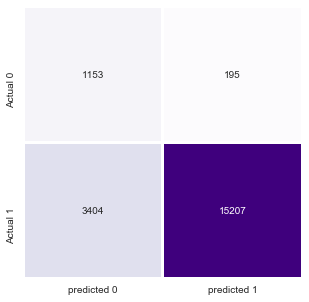

In [182]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_xgb, y_test), cmap="Purples",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [183]:
# ROC AUC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgboost_roc_auc = roc_auc_score(y_test,clf_xgboost.predict(X_test))
xgboost_fpr, xgboost_tpr, thresholds = roc_curve(y_test,clf_xgboost.predict_proba(X_test)[:,1])

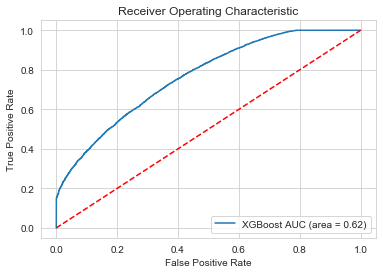

In [184]:
plt.figure()
plt.plot(xgboost_fpr,xgboost_tpr, label="XGBoost AUC (area = %0.2f)" %xgboost_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#### Decision Tree

In [185]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
clf_decision_tree = make_pipeline(DecisionTreeClassifier())

clf_decision_tree.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier())])

In [186]:
decision_tree_cross = fit_and_evaluate(clf_decision_tree)
print('Decision Tree Performance : Cross Validation Score = %0.4f' % decision_tree_cross)

Decision Tree Performance : Cross Validation Score = 0.7471


In [187]:
y_pred_dt = clf_decision_tree.predict(X_test)

In [188]:
acc_dt = round(accuracy_score(y_pred_dt, y_test) * 100, 2)
print("Accuracy Score for Decision Tree is:",acc_dt)

Accuracy Score for Decision Tree is: 75.4


In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46      4505
           1       0.84      0.84      0.84     15454

    accuracy                           0.75     19959
   macro avg       0.65      0.65      0.65     19959
weighted avg       0.76      0.75      0.75     19959



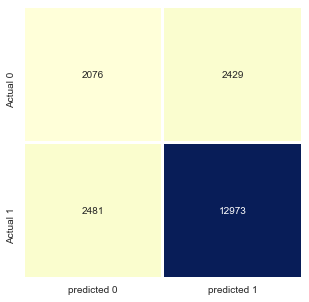

In [190]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_dt, y_test), cmap="YlGnBu",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [191]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test,clf_decision_tree.predict(X_test))
dt_fpr, dt_tpr, thresholds = roc_curve(y_test,clf_decision_tree.predict_proba(X_test)[:,1])

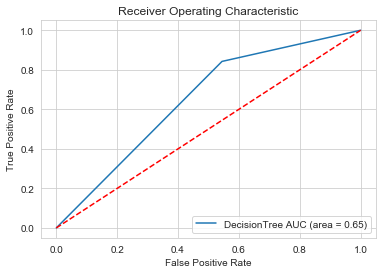

In [192]:
plt.figure()
plt.plot(dt_fpr,dt_tpr, label="DecisionTree AUC (area = %0.2f)" %dt_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#### Stochastic Gradient Boosting

In [193]:
# SGD Classification
from sklearn.linear_model import SGDClassifier
clf_sgd = make_pipeline( SGDClassifier())

clf_sgd.fit(X_train, y_train)

Pipeline(steps=[('sgdclassifier', SGDClassifier())])

In [194]:
sgd_cross = fit_and_evaluate(clf_sgd)
print('Stochastic Gradient Descent Performance : Cross Validation Score = %0.4f' % sgd_cross)

Stochastic Gradient Descent Performance : Cross Validation Score = 0.6609


In [195]:
y_pred_sgd = clf_sgd.predict(X_test)

In [196]:
acc_sgd = round(accuracy_score(y_pred_sgd, y_test) * 100, 2)
print("Accuracy Score for SGD is:",acc_sgd)

Accuracy Score for SGD is: 65.84


In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_sgd, y_test))

              precision    recall  f1-score   support

           0       0.45      0.32      0.38      6377
           1       0.72      0.82      0.76     13582

    accuracy                           0.66     19959
   macro avg       0.59      0.57      0.57     19959
weighted avg       0.63      0.66      0.64     19959



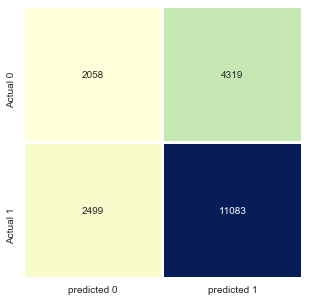

In [198]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_sgd, y_test), cmap="YlGnBu",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [199]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sgd_roc_auc = roc_auc_score(y_test,clf_sgd.decision_function(X_test))
sgd_fpr, sgd_tpr, thresholds = roc_curve(y_test,clf_sgd.decision_function(X_test))

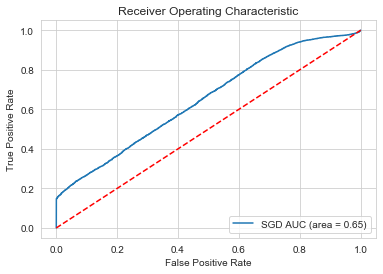

In [200]:
plt.figure()
plt.plot(sgd_fpr,sgd_tpr, label="SGD AUC (area = %0.2f)" %sgd_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#### Perceptron

In [201]:
# Perceptron Classification
from sklearn.linear_model import Perceptron
clf_perc = make_pipeline(Perceptron())

clf_perc.fit(X_train, y_train)

Pipeline(steps=[('perceptron', Perceptron())])

In [202]:
perc_cross = fit_and_evaluate(clf_perc)
print('Perceptron Performance : Cross Validation Score = %0.4f' % perc_cross)

Perceptron Performance : Cross Validation Score = 0.6890


In [203]:
y_pred_perc = clf_perc.predict(X_test)

In [204]:
acc_perc = round(accuracy_score(y_pred_perc, y_test) * 100, 2)
print("Accuracy Score for Perceptron is:",acc_perc)

Accuracy Score for Perceptron is: 63.94


In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_perc, y_test))

              precision    recall  f1-score   support

           0       0.26      0.24      0.25      5038
           1       0.75      0.77      0.76     14921

    accuracy                           0.64     19959
   macro avg       0.51      0.51      0.51     19959
weighted avg       0.63      0.64      0.63     19959



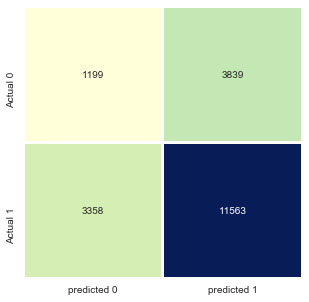

In [206]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_perc, y_test), cmap="YlGnBu",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [207]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
perc_roc_auc = roc_auc_score(y_test,clf_perc.decision_function(X_test))
perc_fpr, perc_tpr, thresholds = roc_curve(y_test,clf_perc.decision_function(X_test))

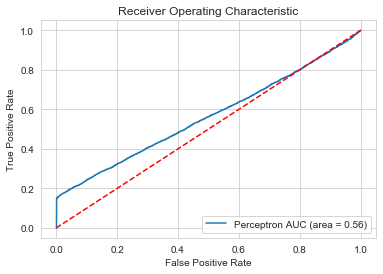

In [208]:
plt.figure()
plt.plot(perc_fpr,perc_tpr, label="Perceptron AUC (area = %0.2f)" %perc_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

#### Linear Support Vector Machine

In [209]:
from sklearn.svm import LinearSVC
clf_lsvc = make_pipeline(LinearSVC())

clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC())])

In [210]:
lsvc_cross = fit_and_evaluate(clf_lsvc)
print('Linear SVC Performance : Cross Validation Score = %0.4f' % lsvc_cross)

Linear SVC Performance : Cross Validation Score = 0.6681


In [211]:
y_pred_lsvc = clf_lsvc.predict(X_test)

In [212]:
acc_lsvc = round(accuracy_score(y_pred_lsvc, y_test) * 100, 2)
print("Accuracy Score for Linear SVC is:",acc_lsvc)

Accuracy Score for Linear SVC is: 78.34


In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_lsvc, y_test))

              precision    recall  f1-score   support

           0       0.05      1.00      0.10       233
           1       1.00      0.78      0.88     19726

    accuracy                           0.78     19959
   macro avg       0.53      0.89      0.49     19959
weighted avg       0.99      0.78      0.87     19959



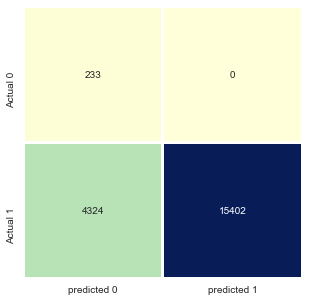

In [214]:
plt.figure(figsize=(5,5))
from sklearn.metrics import confusion_matrix
Confusion_matrix = sns.heatmap(confusion_matrix(y_pred_lsvc, y_test), cmap="YlGnBu",annot=True, fmt='d', linewidth=2,xticklabels=['predicted 0','predicted 1'],yticklabels=['Actual 0','Actual 1'], cbar=False)

In [215]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lsvc_roc_auc = roc_auc_score(y_test,clf_lsvc.decision_function(X_test))
lsvc_fpr, lsvc_tpr, thresholds = roc_curve(y_test,clf_lsvc.decision_function(X_test))

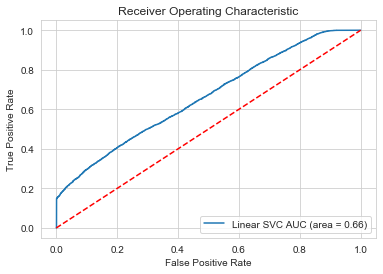

In [216]:
plt.figure()
plt.plot(lsvc_fpr,lsvc_tpr, label="Linear SVC AUC (area = %0.2f)" %lsvc_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [217]:
# Comparing Model Scores

In [218]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-NN',
                                           'Naive Bayes', 'Random Forest',
                                            'Gradiente Boosting', 'Decision Tree','SGD',
                                                  'Perceptron','Linear SVC','Extra Tree'],
    'Score': [acc_logistic, acc_knn, acc_naive, 
              acc_rf , acc_xgboost, acc_dt, acc_sgd,
              acc_perc, acc_lsvc, acc_xtree]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Gradiente Boosting,81.97
3,Random Forest,81.94
9,Extra Tree,81.77
0,Logistic Regression,81.75
8,Linear SVC,78.34
5,Decision Tree,75.40
1,K-NN,73.73
6,SGD,65.84
7,Perceptron,63.94
2,Naive Bayes,34.45


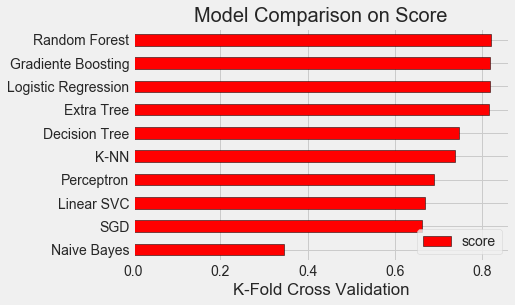

In [219]:
plt.style.use('fivethirtyeight')
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'K-NN',
                                           'Naive Bayes', 'Random Forest',
                                            'Gradiente Boosting', 'Decision Tree','SGD','Perceptron','Linear SVC','Extra Tree'],
                                 'score': [logr_cross, knn_cross, 
                                           naive_cross, random_cross,
                                           gb_cross, decision_tree_cross, sgd_cross, perc_cross, lsvc_cross, xtree_cross]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);

In [220]:
# Comparing Curves

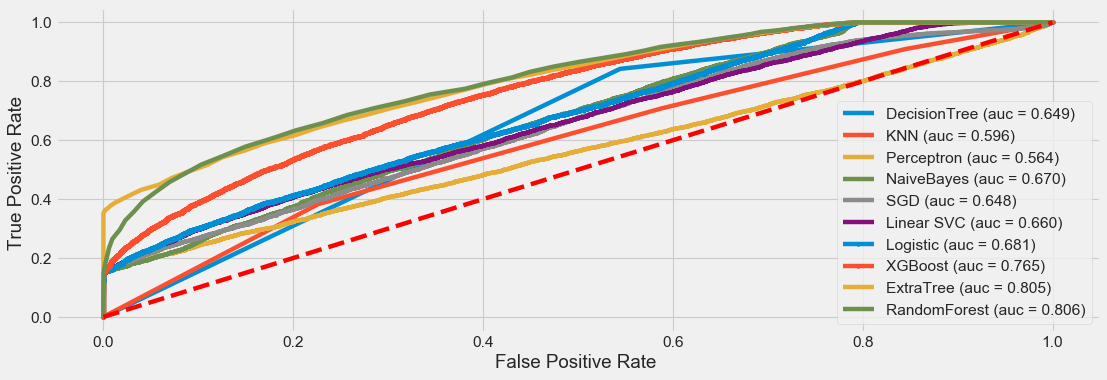

In [221]:
from sklearn.metrics import roc_curve, auc

auc_log = auc(log_fpr, log_tpr)
auc_knn = auc(knn_fpr, knn_tpr)
auc_naive = auc(naive_fpr, naive_tpr)
auc_rf = auc(rf_fpr, rf_tpr)
auc_xgboost = auc(xgboost_fpr, xgboost_tpr)
auc_dt = auc(dt_fpr, dt_tpr)
auc_sgd = auc(sgd_fpr, sgd_tpr)
auc_perc = auc(perc_fpr, perc_tpr)
auc_lsvc = auc(lsvc_fpr, lsvc_tpr)
auc_xtree = auc(xtree_fpr, xtree_tpr)

plt.figure(figsize=(15, 5), dpi=80)

plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DecisionTree (auc = %0.3f)' % auc_dt)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(perc_fpr, perc_tpr, linestyle='-', label='Perceptron (auc = %0.3f)' % auc_perc)
plt.plot(naive_fpr, naive_tpr, linestyle='-', label='NaiveBayes (auc = %0.3f)' % auc_naive)
plt.plot(sgd_fpr, sgd_tpr, linestyle='-', label='SGD (auc = %0.3f)' % auc_sgd)
plt.plot(lsvc_fpr, lsvc_tpr, linestyle='-', label='Linear SVC (auc = %0.3f)' % auc_lsvc)
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_log)
plt.plot(xgboost_fpr, xgboost_tpr, marker='.', label='XGBoost (auc = %0.3f)' % auc_xgboost)
plt.plot(xtree_fpr, xtree_tpr, linestyle='-', label='ExtraTree (auc = %0.3f)' % auc_xtree)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RandomForest (auc = %0.3f)' % auc_rf)



plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05 , 1.05])
plt.ylim([-0.05 , 1.05])

plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')

plt.legend()

plt.show()


In [222]:
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print("X_test  Shape: ",X_test.shape)
print("y_test  Shape: ",y_test.shape)

X_train Shape:  (79835, 38)
y_train Shape:  (79835,)
X_test  Shape:  (19959, 38)
y_test  Shape:  (19959,)


In [223]:
#set ids as Loan_ID and predict Loan Status
ids = test['Loan_ID']

In [224]:
predictions = clf_rf.predict(test.drop('Loan_ID', axis=1))

In [225]:
output = pd.DataFrame({'Loan_ID' : ids, 'Loan_Status': predictions })

In [226]:
output.to_csv('submit.csv', index = False)

In [227]:
output.tail(50)

,Loan_ID,Loan_Status
9950,a991d230-5c2b-4bea-9e87-6733cab6a0f1,1
9951,3e8a1f0f-f3e7-4a84-b5f9-478fad455d37,0
9952,7894612c-d892-4ac7-94b6-48b1ea0b27b8,1
9953,5e0d8bc7-16bd-4e77-9c0d-5b27a5f6d778,1
9954,c358295e-add1-480a-9ad3-a3d3a8bebb7a,0
9955,63e5430f-c741-4f03-bcd7-8c8f9d4faec7,1
9956,7c89f0b8-f007-4812-87c0-269f679004ed,1
9957,73ad81f9-ca8a-46d7-80de-7dbcdaf95998,1
9958,99a0b3eb-9875-480d-84eb-773539e1eceb,0
9959,e8f109aa-6362-4cd5-bd58-06ad77a6c01c,1


In [228]:
print("X_train Shape: ",X_train.shape)
print("y_train Shape: ",y_train.shape)
print("X_test  Shape: ",X_test.shape)
print("y_test  Shape: ",y_test.shape)

X_train Shape:  (79835, 38)
y_train Shape:  (79835,)
X_test  Shape:  (19959, 38)
y_test  Shape:  (19959,)


In [229]:
X_train = abs(X_train)

In [230]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_train,y_train)

In [231]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

In [232]:
featureScore = pd.concat([dfcolumns,dfscores], axis=1)
featureScore.columns = ['Specification','Test_Score']

In [233]:
featureScore

,Specification,Test_Score
0,Loan_Amount,2.598205e+11
1,Credit_Score,2.174781e+07
2,Annual_Income,1.096407e+08
3,Monthly_Debt,1.262980e+02
4,Credit_Age,1.551711e+00
5,Open_Accounts,2.135749e+00
6,Credit_Problems,2.959710e-02
7,Credit_Balance,4.794474e+01
8,Open_Credit,6.202644e+08
9,Tax_Liens,8.447031e+00


In [234]:
print(featureScore.nlargest(5, 'Test_Score'))

      Specification    Test_Score
0       Loan_Amount  2.598205e+11
8       Open_Credit  6.202644e+08
2     Annual_Income  1.096407e+08
1      Credit_Score  2.174781e+07
10  Term_Short Term  2.645933e+02


In [235]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [236]:
Accuracy = accuracy_score(y_test,model.predict(X_test))
print('Accuracy is: ',Accuracy)

Accuracy is:  0.8194298311538655


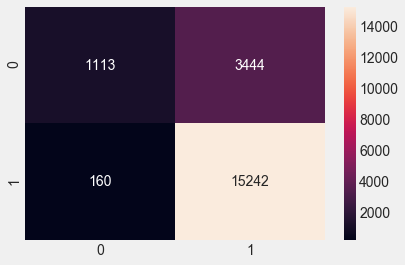

In [237]:
cm_2 = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d");

In [238]:
print(model.feature_importances_)

[1.23442751e-01 2.18144845e-01 7.81182115e-02 9.79143986e-02
 9.11041012e-02 6.31953911e-02 1.18839719e-02 9.53896442e-02
 9.72571144e-02 3.26198070e-03 1.24171295e-02 1.07730667e-02
 7.16820471e-03 6.21473958e-03 5.74258011e-03 6.12483983e-03
 5.62590406e-03 5.57572767e-03 5.19497845e-03 4.92637921e-03
 6.64529575e-03 7.51658263e-03 6.58207433e-03 1.29675183e-03
 1.39015469e-03 8.30636678e-03 2.29671053e-04 4.05850771e-03
 2.04640594e-03 3.19479705e-03 9.23164458e-04 8.27463847e-04
 5.01271734e-04 4.95467913e-03 7.20297862e-05 1.21051104e-03
 4.17196221e-04 3.51116463e-04]


In [239]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances

Loan_Amount                     0.123443
Credit_Score                    0.218145
Annual_Income                   0.078118
Monthly_Debt                    0.097914
Credit_Age                      0.091104
Open_Accounts                   0.063195
Credit_Problems                 0.011884
Credit_Balance                  0.095390
Open_Credit                     0.097257
Tax_Liens                       0.003262
Term_Short Term                 0.012417
Job_Age_10+ years               0.010773
Job_Age_2 years                 0.007168
Job_Age_3 years                 0.006215
Job_Age_4 years                 0.005743
Job_Age_5 years                 0.006125
Job_Age_6 years                 0.005626
Job_Age_7 years                 0.005576
Job_Age_8 years                 0.005195
Job_Age_9 years                 0.004926
Job_Age_LessThan_1 years        0.006645
Home_Ownership_Home Mortgage    0.007517
Home_Ownership_Own Home         0.006582
Purpose_Buy House               0.001297
Purpose_Buy a Ca

In [240]:
# Feature Selection

In [241]:
# Extract the names of the most important features
most_important_features = feat_importances.nlargest(5)
most_important_features 


Credit_Score      0.218145
Loan_Amount       0.123443
Monthly_Debt      0.097914
Open_Credit       0.097257
Credit_Balance    0.095390
dtype: float64

In [242]:
# Find the index that corresponds to each feature name
indices = [list(feat_importances.nlargest(5)).index(x) for x in most_important_features]
indices

[0, 1, 2, 3, 4]

In [243]:
# Keep only the most important features
cols = ['Credit_Score', 'Loan_Amount','Monthly_Debt', 'Open_Credit', 'Credit_Balance']
X_train_reduced = X_train[cols]
X_train_reduced

,Credit_Score,Loan_Amount,Monthly_Debt,Open_Credit,Credit_Balance
70679,684.000000,99999999.0,155.914592,120010.0,207.677635
77405,1076.275101,209616.0,61.604058,221936.0,401.965173
3900,701.000000,32362.0,25.543297,215688.0,428.991841
6625,684.000000,335060.0,90.064810,382228.0,467.825822
5593,667.000000,391908.0,95.748055,217514.0,353.957625
...,...,...,...,...,...
50150,1076.275101,216150.0,75.393833,146234.0,349.093111
98247,742.000000,99999999.0,105.638345,288684.0,323.587701
5198,739.000000,287342.0,88.950379,413292.0,512.888877
77855,687.000000,413336.0,184.279896,684640.0,566.623332


In [244]:
# Keep only the most important features
X_test_reduced = X_test[cols]
X_test_reduced

,Credit_Score,Loan_Amount,Monthly_Debt,Open_Credit,Credit_Balance
61697,741.0,223960.0,94.836860,64922.0,105.337553
48030,743.0,99999999.0,172.795023,182600.0,368.268923
23406,6390.0,783244.0,170.359913,716012.0,648.934511
41879,7210.0,431068.0,167.800626,545072.0,642.904347
40567,648.0,32186.0,110.299955,107404.0,158.845837
...,...,...,...,...,...
33062,731.0,224114.0,83.130500,132088.0,234.490938
13825,722.0,360272.0,207.308611,985732.0,871.910546
46489,742.0,220088.0,50.278723,1099846.0,324.701401
51287,702.0,551606.0,150.827352,441232.0,583.018010


In [245]:
print('Most important training features shape: ', X_train_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (79835, 5)
Most important testing  features shape:  (19959, 5)


In [246]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)


In [247]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
clf_rf_red = RandomForestClassifier()

In [248]:
clf_rf_red.fit(X_train_reduced, y_train)

RandomForestClassifier()

In [249]:
random_cross_red = fit_and_evaluate(clf_rf_red)
print('Gradient Boosting Performance : Cross Validation Score = %0.4f' % random_cross_red)

Gradient Boosting Performance : Cross Validation Score = 0.8190


In [250]:
random_red_model = clf_rf_red.fit(X_train_reduced, y_train)

In [251]:
generate_accuracy_and_heatmap(random_red_model, X_test_reduced, y_test)

Accuracy is:  0.8130166842026154
F1 score is:  0.8901318888365519


In [252]:
# Flask Frontend 

In [253]:
import joblib

In [254]:
joblib.dump(clf_rf_red , "model.pkl")

['model.pkl']

In [255]:
model = joblib.load("model.pkl")

In [256]:
model

RandomForestClassifier()

#### Set of full features and Set of Reduced features generate same result

In [257]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [258]:
XGB = XGBClassifier()

# Fit on full set of features
XGB.fit(X_train, y_train)
XGB_full_pred = XGB.predict(X_test)

# Fit on reduced set of features
XGB.fit(X_train_reduced, y_train)
XGB_reduced_pred = XGB.predict(X_test_reduced)

# Display results
print('Logistic Regression Full Results: MAE =    %0.4f.' % mae(y_test, XGB_full_pred))
print('Logistic Regression Reduced Results: MAE = %0.4f.' % mae(y_test, XGB_reduced_pred))

Logistic Regression Full Results: MAE =    0.1803.
Logistic Regression Reduced Results: MAE = 0.1824.
